# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('/content/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd

# Select the folder having data files
os.chdir('/content/drive/MyDrive/trip_records')

# Create a list of all files in the folder
file_list = os.listdir()

# Initialize an empty DataFrame to store the final combined sampled data
df = pd.DataFrame()

# Iterate through each file and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        if file_name.endswith('.parquet'):
            data = pd.read_parquet(file_path)
        else:
            print(f"Skipping unsupported file type: {file_name}")
            continue

        # Check if the expected column exists
        if 'tpep_pickup_datetime' not in data.columns:
            print(f"File {file_name} does not have 'tpep_pickup_datetime' column. Skipping.")
            continue

        # Convert 'tpep_pickup_datetime' to datetime; invalid parsing will result in NaT
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
        # Drop rows where conversion failed
        data = data.dropna(subset=['tpep_pickup_datetime'])

        # Create new columns for date and hour to help with grouping
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # DataFrame to store sampled data for the current file
        sampled_data = pd.DataFrame()
         # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        # Loop through each unique date in the current file

        for date in data['date'].unique():
            day_data = data[data['date'] == date]

            # Loop through dates and then loop through every hour of each date
            for hour in range(24):
                hour_data = day_data[day_data['hour'] == hour]
                if not hour_data.empty:
                     # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


Skipping unsupported file type: .ipynb_checkpoints


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
# df.to_parquet('')
# To save as a Parquet file
# Save the combined DataFrame as a CSV file
df.to_csv('combined_trip_data.csv', index=False)

# Save the combined DataFrame as a Parquet file
df.to_parquet('combined_trip_data.parquet', index=False)



## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file

df = pd.read_csv('combined_trip_data.csv')

In [8]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             0  ...      0.5        4.32          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       15.71          6.94   
3             4  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour airport_fee  
0  2023-09-01     0         NaN  
1  2023-09-01     0         NaN  
2  2023-09-01     0         NaN  
3  2023-09-01     0         NaN  
4  2023-09-01     0         NaN  

[5 rows x 22 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  date                   object 
 20  hour                   int64  
 21  airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [10]:

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

# Drop additional columns not directly relevant to taxi operations optimization and revenue analysis
# For instance, we drop detailed fare components and flags that aren't needed
columns_to_drop = [
    "store_and_fwd_flag",   # "store_and_fwd_flag": Not directly useful for operations or revenue analysis.
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display final DataFrame columns and info to verify the changes
print("\nFinal DataFrame columns:")
print(df.columns)
print("\nFinal DataFrame info:")
df.info()



Final DataFrame columns:
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'date', 'hour', 'airport_fee'],
      dtype='object')

Final DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra   

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [11]:

if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    # First, check if both columns have identical values
    if df['Airport_fee'].equals(df['airport_fee']):
        # If they are identical, drop the duplicate column
        df.drop(columns=['airport_fee'], inplace=True)
        print("Columns 'Airport_fee' and 'airport_fee' are identical. Dropped 'airport_fee'.")
    else:
        # They are not identical; create a combined column
        # This will use the value from 'Airport_fee' when available, otherwise from 'airport_fee'
        df['airport_fee_combined'] = df['Airport_fee'].combine_first(df['airport_fee'])

        # Optionally, check if there are any rows where both columns have non-null, differing values
        mismatches = df[(df['Airport_fee'].notnull()) & (df['airport_fee'].notnull()) & (df['Airport_fee'] != df['airport_fee'])]
        if not mismatches.empty:
            print("Warning: There are rows with different values in 'Airport_fee' and 'airport_fee'.")
        else:
            print("Combined columns 'Airport_fee' and 'airport_fee' into 'airport_fee_combined' without discrepancies.")

        # Optionally, if you no longer need the original columns, drop them:
        # df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)
else:
    print("One or both airport fee columns are not present in the DataFrame.")
print(df.info())

Combined columns 'Airport_fee' and 'airport_fee' into 'airport_fee_combined' without discrepancies.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  Airport_fee            float64
 18  date                   object 
 19  hour                   int

In [12]:
# Drop the original airport fee columns
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)

# Rename the combined column to 'Airport_fee'
df.rename(columns={'airport_fee_combined': 'Airport_fee'}, inplace=True)

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  date                   object 
 18  hour                   int64  
 19  Airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 289.4+ MB
None


**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative

# check where values of fare_amount are negative
negative_fares = df[df['fare_amount'] < 0]
print("Number of negative fare amounts:", negative_fares.shape[0])
print(negative_fares.head())


Number of negative fare amounts: 0
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [14]:
# Analyse RatecodeID for the negative fare amounts

negative_fares_ratecode = df[df['fare_amount'] < 0]['RatecodeID'].value_counts()
print("RatecodeID distribution for records with negative fare amounts:")
print(negative_fares_ratecode)


RatecodeID distribution for records with negative fare amounts:
Series([], Name: count, dtype: int64)


In [15]:
# Find which columns have negative values

numeric_columns = df.select_dtypes(include='number').columns
neg_cols = [col for col in numeric_columns if (df[col] < 0).any()]

print("Columns with negative values:", neg_cols)


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [16]:
# fix these negative values
cols_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

# Replace negative values with 0 in each column
for col in cols_to_fix:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"Fixing {negative_count} negative values in '{col}'")
        df.loc[df[col] < 0, col] = 0

# Verify that there are no more negative values in these columns
fixed_negatives = [col for col in cols_to_fix if (df[col] < 0).any()]
print("Columns with negative values after fixing:", fixed_negatives)


Fixing 3 negative values in 'extra'
Fixing 73 negative values in 'mta_tax'
Fixing 78 negative values in 'improvement_surcharge'
Fixing 78 negative values in 'total_amount'
Fixing 56 negative values in 'congestion_surcharge'
Fixing 15 negative values in 'Airport_fee'
Columns with negative values after fixing: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [17]:
# Find the proportion of missing values in each column

missing_counts = df.isnull().sum()

# Calculate the total number of values in the DataFrame
total_counts = len(df)  # Alternatively, you can use df.count() if columns differ in length

# Calculate the proportion of missing values for each column
missing_proportions = missing_counts / total_counts

# Sort the proportions in descending order to highlight columns with the most missing data
missing_proportions_sorted = missing_proportions.sort_values(ascending=False)

print("Proportion of Missing Values per Column:")
print(missing_proportions_sorted)



Proportion of Missing Values per Column:
Airport_fee              0.034209
passenger_count          0.034209
RatecodeID               0.034209
congestion_surcharge     0.034209
mta_tax                  0.000000
hour                     0.000000
date                     0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
fare_amount              0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
extra                    0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [18]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

null_rows = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

# Impute NaN values in 'passenger_count' with the median value
median_passenger_count = df['passenger_count'].median()
df['passenger_count'].fillna(median_passenger_count, inplace=True)
print(f"\nImputed NaN values in 'passenger_count' with the median value: {median_passenger_count}")

# Optional: Verify that there are no more NaN values in 'passenger_count'
print("\nMissing values in 'passenger_count':", df['passenger_count'].isnull().sum())



Rows with null values:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
85              2  2023-09-01 00:01:15   2023-09-01 00:07:07              NaN   
151             2  2023-09-01 01:58:13   2023-09-01 02:12:29              NaN   
203             2  2023-09-01 01:08:34   2023-09-01 01:20:38              NaN   
251             1  2023-09-01 02:29:04   2023-09-01 02:45:34              NaN   
...           ...                  ...                   ...              ...   
1896373         2  2023-11-30 23:38:07   2023-11-30 23:50:50              NaN   
1896376         1  2023-11-30 23:49:26   2023-11-30 23:56:00              NaN   
1896391         2  2023-11-30 23:44:13   2023-11-30 23:52:02              NaN   
1896392         2  2023-11-30 23:17:41   2023-11-30 23:32:07              NaN   
1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15              NaN   

    

Did you find zeroes in passenger_count? Handle these.

In [19]:
# Check for rows where passenger_count is zero
zero_passenger_rows = df[df['passenger_count'] == 0]
print("Number of rows with passenger_count equal to 0:", len(zero_passenger_rows))

# Calculate the median passenger_count from non-zero entries
non_zero_median = df.loc[df['passenger_count'] != 0, 'passenger_count'].median()
print("Median of non-zero passenger_count:", non_zero_median)

# Replace zero values in passenger_count with the non-zero median
df.loc[df['passenger_count'] == 0, 'passenger_count'] = non_zero_median

# Verify that there are no more zero values
print("Number of rows with passenger_count equal to 0 after replacement:", (df['passenger_count'] == 0).sum())


Number of rows with passenger_count equal to 0: 29681
Median of non-zero passenger_count: 1.0
Number of rows with passenger_count equal to 0 after replacement: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'
# Check missing values in 'RatecodeID'
missing_ratecode = df['RatecodeID'].isnull().sum()
print("Missing RatecodeID values before imputation:", missing_ratecode)

# Impute missing values in 'RatecodeID' using the mode
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode, inplace=True)
print("Imputed missing RatecodeID values with mode value:", mode_ratecode)

# Verify that there are no more missing values in 'RatecodeID'
print("Missing RatecodeID values after imputation:", df['RatecodeID'].isnull().sum())


Missing RatecodeID values before imputation: 64874
Imputed missing RatecodeID values with mode value: 1.0
Missing RatecodeID values after imputation: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge

# Check the number of missing values in congestion_surcharge before imputation
missing_congestion = df['congestion_surcharge'].isnull().sum()
print("Missing values in congestion_surcharge before imputation:", missing_congestion)

# Impute NaN values in congestion_surcharge with 0, assuming missing implies no surcharge
df['congestion_surcharge'].fillna(0, inplace=True)

# Verify that there are no more missing values in congestion_surcharge
missing_congestion_after = df['congestion_surcharge'].isnull().sum()
print("Missing values in congestion_surcharge after imputation:", missing_congestion_after)



Missing values in congestion_surcharge before imputation: 64874
Missing values in congestion_surcharge after imputation: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [22]:
# Handle any remaining missing values
missing_counts = df.isnull().sum()
print("Missing values in each column before handling remaining missing values:")
print(missing_counts)


Missing values in each column before handling remaining missing values:
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
date                         0
hour                         0
Airport_fee              64874
dtype: int64


In [23]:
# Impute missing values in 'Airport_fee' with 0
if df['Airport_fee'].isnull().sum() > 0:
    missing_count = df['Airport_fee'].isnull().sum()
    df['Airport_fee'].fillna(0, inplace=True)
    print(f"\nFilled {missing_count} missing values in 'Airport_fee' with 0.")

# Display missing counts after handling
print("\nMissing values after handling:")
print(df.isnull().sum())



Filled 64874 missing values in 'Airport_fee' with 0.

Missing values after handling:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [24]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print("Summary statistics for numeric columns:")
display(df.describe())


Summary statistics for numeric columns:


VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896400e+06     1.896400e+06   1.896400e+06  1.896400e+06   
mean   1.733026e+00     1.372236e+00   3.858293e+00  1.612981e+00   
std    4.476401e-01     8.644038e-01   1.294085e+02  7.267261e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01  1.588020e+00   
std    6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02  1.829197e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.896400e+06  1.896400e+06  1.896400e+06           1.896400e+06   
mean   4.952989e-01  3.547011e+00  5.965338e-01           9.990118e-01   
std    4.855675e-02  4.054882e+00  2.187878e+00           2.907216e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge          hour   Airport_fee  
count  1.896400e+06          1.896400e+06  1.896400e+06  1.896400e+06  
mean   2.898201e+01          2.228660e+00  1.426504e+01  1.380220e-01  
std    1.064162e+02          7.776405e-01  5.807381e+00  4.575627e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.596000e+01          2.500000e+00  1.100000e+01  0.000000e+00  
50%    2.100000e+01          2.500000e+00  1.500000e+01  0.000000e+00  
75%    3.094000e+01          2.500000e+00  1.900000e+01  0.000000e+00  
max    1.431675e+05          2.500000e+00  2.300000e+01  1.750000e+00

In [25]:
# List numeric columns to inspect outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'hour', 'Airport_fee']


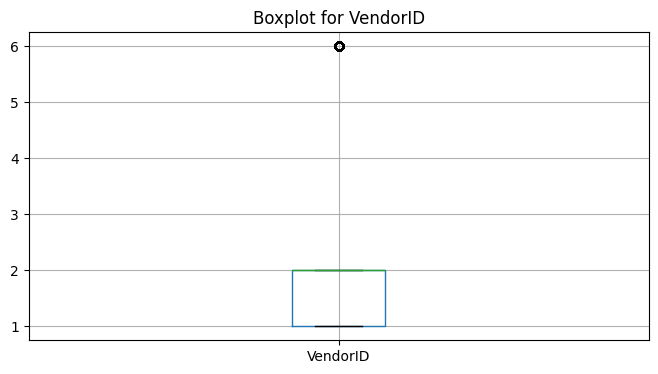

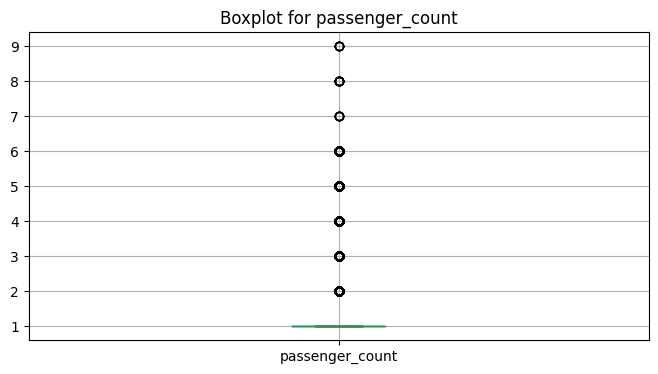

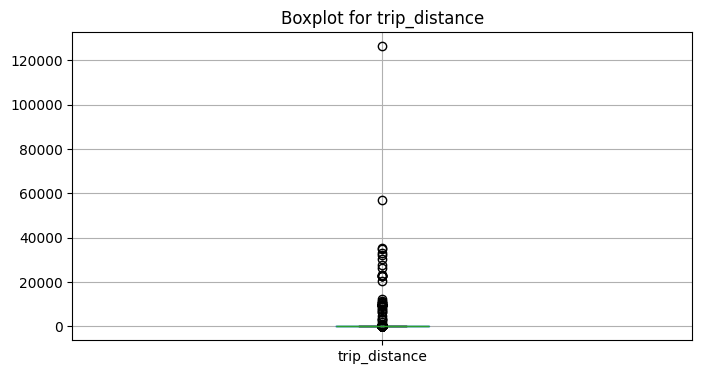

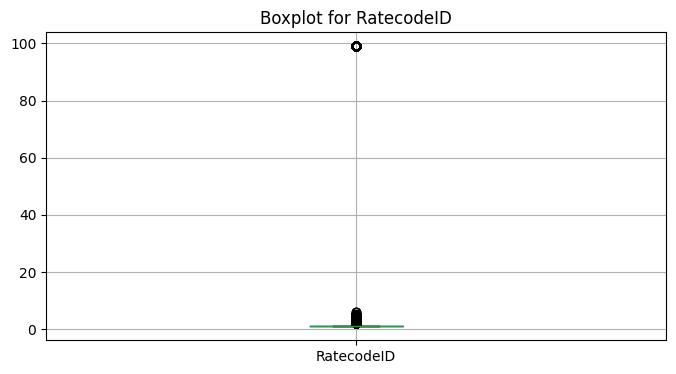

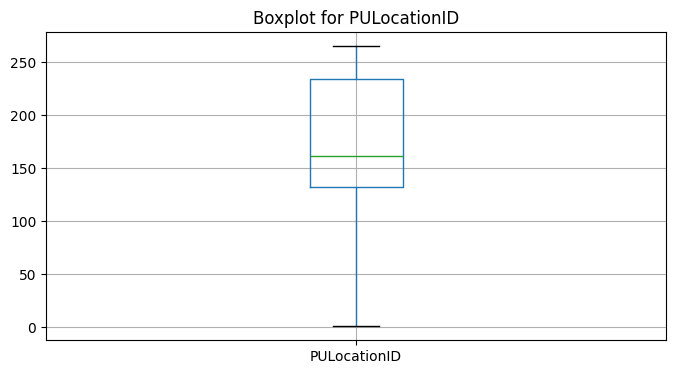

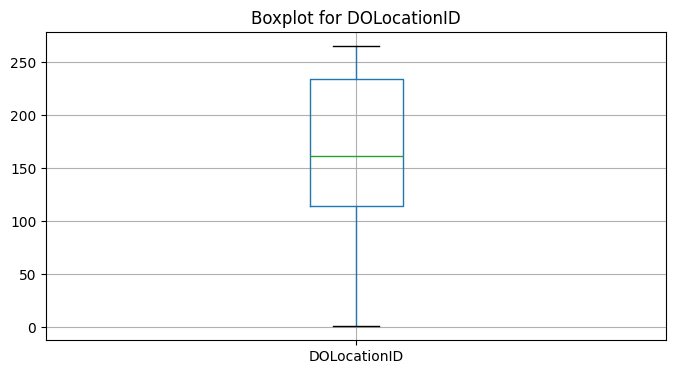

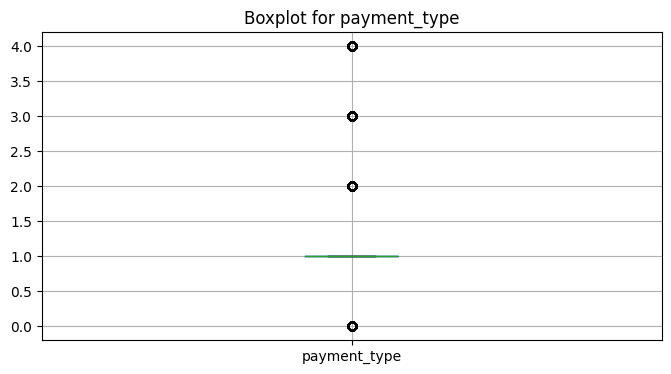

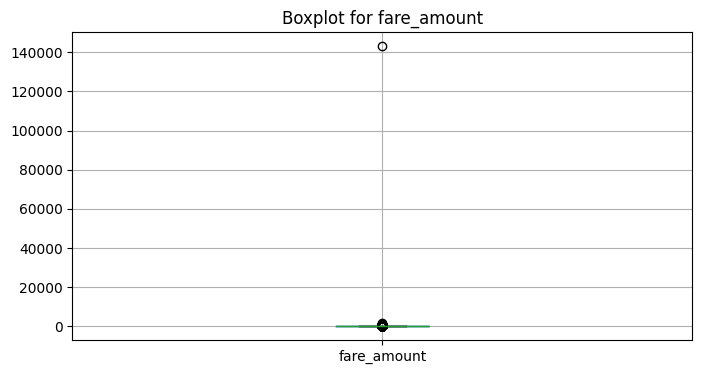

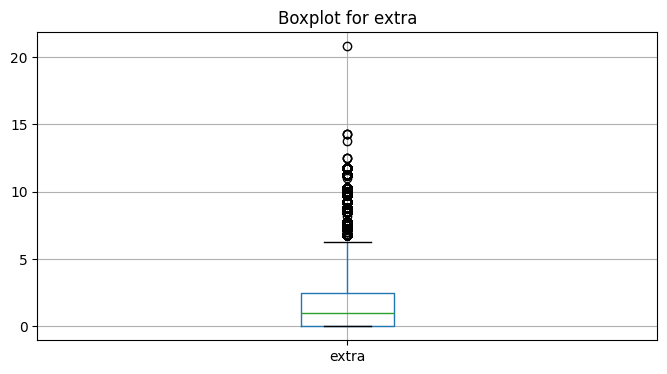

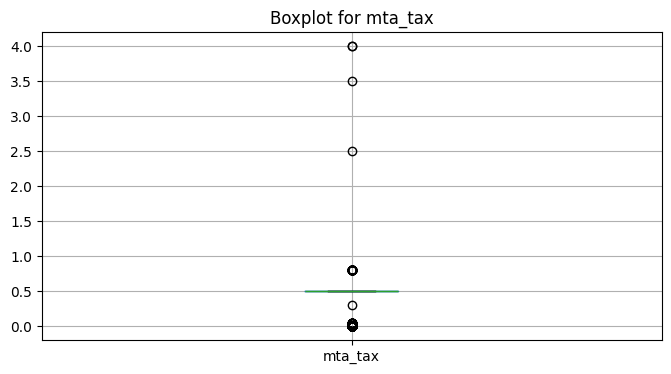

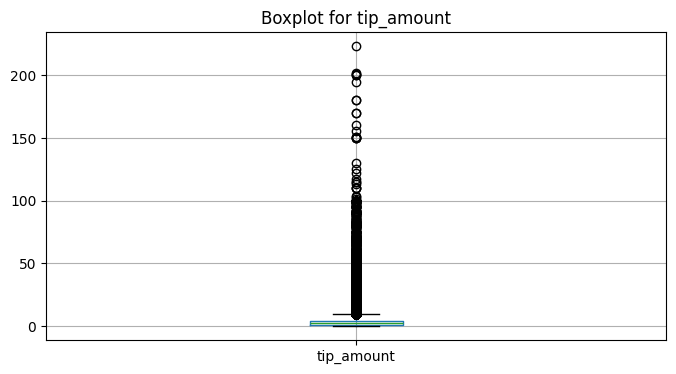

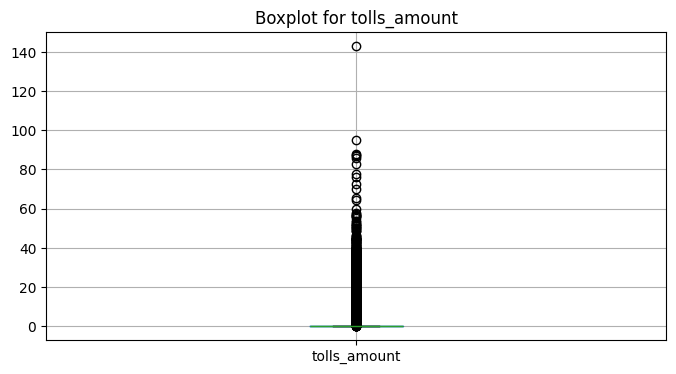

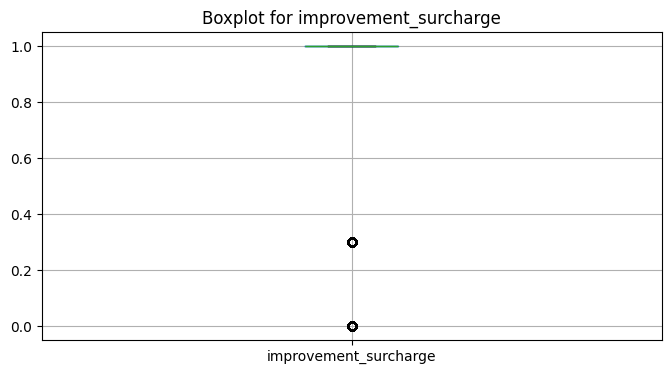

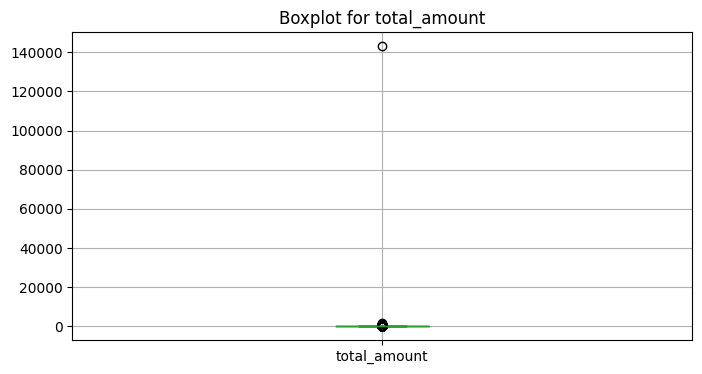

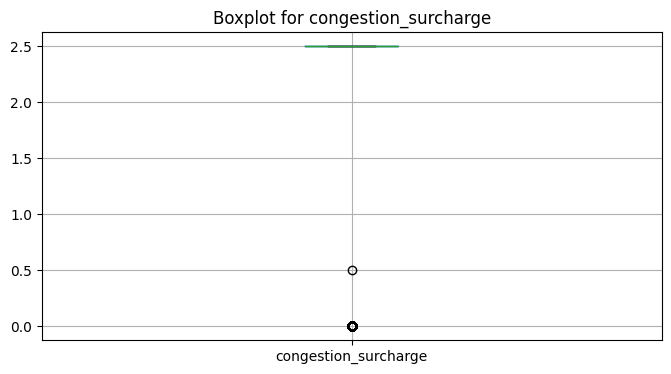

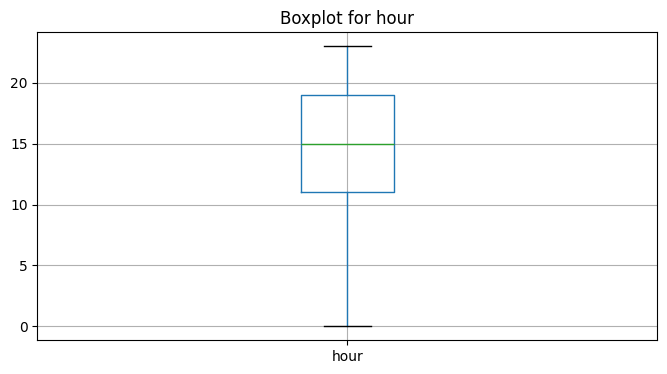

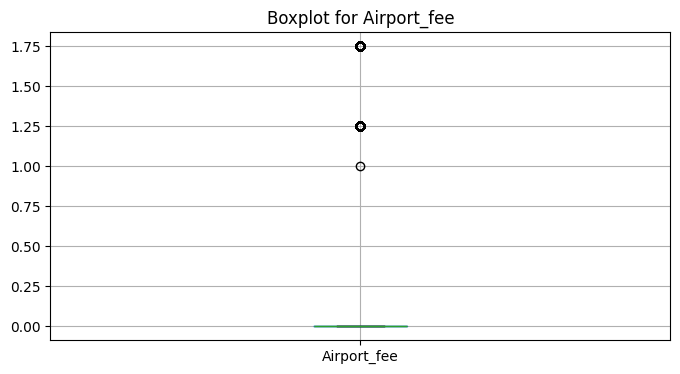

In [26]:
# Create boxplots for each numeric column to visually inspect outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [27]:
# Function to detect outliers using the IQR method
def detect_outliers(col_data):
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    return lower_bound, upper_bound, outliers

# Check potential outliers for key columns
for col in ['trip_distance', 'fare_amount', 'total_amount']:
    lower_bound, upper_bound, outliers = detect_outliers(df[col])
    print(f"\n{col} statistics:")
    print(f"  Lower bound: {lower_bound}")
    print(f"  Upper bound: {upper_bound}")
    print(f"  Number of potential outliers: {len(outliers)}")


trip_distance statistics:
  Lower bound: -2.4749999999999996
  Upper bound: 6.924999999999999
  Number of potential outliers: 249302

fare_amount statistics:
  Lower bound: -9.599999999999998
  Upper bound: 40.8
  Number of potential outliers: 197413

total_amount statistics:
  Lower bound: -6.509999999999998
  Upper bound: 53.41
  Number of potential outliers: 218083


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print("After removing passenger_count > 6:", df.shape)


After removing passenger_count > 6: (1896379, 20)


In [29]:
# Continue with outlier handling

# 2. Remove rows with negative values in trip_distance, fare_amount, or total_amount
# (negative values do not make sense in this context)
negative_condition = (df['trip_distance'] < 0) | (df['fare_amount'] < 0) | (df['total_amount'] < 0)
print("Rows to remove (negative values):", negative_condition.sum())
df = df[~negative_condition].copy()

Rows to remove (negative values): 0


In [30]:
# 3. Remove rows where trip_distance is nearly 0 (e.g., < 0.1 miles) but fare_amount is unusually high (> 300)
condition1 = (df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)
print("Rows to remove (trip_distance < 0.1 & fare_amount > 300):", condition1.sum())
df = df[~condition1].copy()

Rows to remove (trip_distance < 0.1 & fare_amount > 300): 35


In [31]:
# 4. Remove rows where trip_distance and fare_amount are both 0 but the pickup and dropoff zones differ
# (i.e. PULocationID != DOLocationID)
condition2 = (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])
print("Rows to remove (trip_distance and fare_amount are 0 but zones differ):", condition2.sum())
df = df[~condition2].copy()


Rows to remove (trip_distance and fare_amount are 0 but zones differ): 63


In [32]:
# 5. Remove rows where trip_distance is more than 250 miles (unlikely for city taxi trips)
condition3 = (df['trip_distance'] > 250)
print("Rows to remove (trip_distance > 250 miles):", condition3.sum())
df = df[~condition3].copy()

Rows to remove (trip_distance > 250 miles): 46


In [33]:
# 6. Remove rows where payment_type is 0 (this value is not defined in the data dictionary)
condition4 = (df['payment_type'] == 0)
print("Rows to remove (payment_type is 0):", condition4.sum())
df = df[~condition4].copy()

print("Final shape after handling outliers:", df.shape)

Rows to remove (payment_type is 0): 64844
Final shape after handling outliers: (1831391, 20)


In [34]:
# Do any columns need standardising?
# Display summary statistics for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Summary statistics for numeric columns:")
print(df[numeric_cols].describe())


Summary statistics for numeric columns:
           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.831391e+06     1.831391e+06   1.831391e+06  1.831391e+06   
mean   1.736326e+00     1.385349e+00   3.444838e+00  1.634046e+00   
std    4.406249e-01     8.764050e-01   4.545772e+00  7.390655e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.780000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.370000e+00  1.000000e+00   
max    2.000000e+00     6.000000e+00   2.048600e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06   
mean   1.654589e+02  1.643336e+02  1.205003e+00  1.981667e+01  1.638295e+00   
std    6.367245e+01  6.973985e+01  4.664804e-01  1.073392e+02  1.836115e+00   
min    1.000000e+00  1

beneficial to standardize only the continuous monetary or distance columns
The categorical or limited-range columns (VendorID, passenger_count, RatecodeID, PULocationID, DOLocationID, payment_type, and hour) generally do not need standardization.

In [35]:
from sklearn.preprocessing import StandardScaler



In [36]:
# List the continuous columns that may benefit from standardization
cols_to_scale = ['trip_distance', 'fare_amount', 'tip_amount',
                 'tolls_amount', 'total_amount', 'extra',
                 'mta_tax', 'congestion_surcharge', 'Airport_fee']

# Initialize the scaler
scaler = StandardScaler()

# Create a copy of these columns for scaling
df_scaled = df.copy()

# Apply standardization
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Display new summary statistics for the standardized columns
print("Summary statistics for standardized continuous columns:")
print(df_scaled[cols_to_scale].describe())


Summary statistics for standardized continuous columns:
       trip_distance   fare_amount    tip_amount  tolls_amount  total_amount  \
count   1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06   
mean   -1.834989e-16 -2.488115e-17  3.519753e-17 -1.284834e-16 -6.061021e-17   
std     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    -7.578116e-01 -1.846173e-01 -8.781381e-01 -2.728329e-01 -2.674284e-01   
25%    -5.268276e-01 -9.797605e-02 -6.324038e-01 -2.728329e-01 -1.199465e-01   
50%    -3.662388e-01 -5.884773e-02 -1.753379e-01 -2.728329e-01 -7.337329e-02   
75%    -1.646316e-02  1.940889e-02  2.153796e-01 -2.728329e-01  1.626169e-02   
max     4.430825e+01  1.333564e+03  5.394027e+01  6.520939e+01  1.322703e+03   

              extra       mta_tax  congestion_surcharge   Airport_fee  
count  1.831391e+06  1.831391e+06          1.831391e+06  1.831391e+06  
mean  -4.630927e-17 -1.816209e-15          1.940520e-16 -8.620911e-17  
std    

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [41]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [42]:

import seaborn as sns

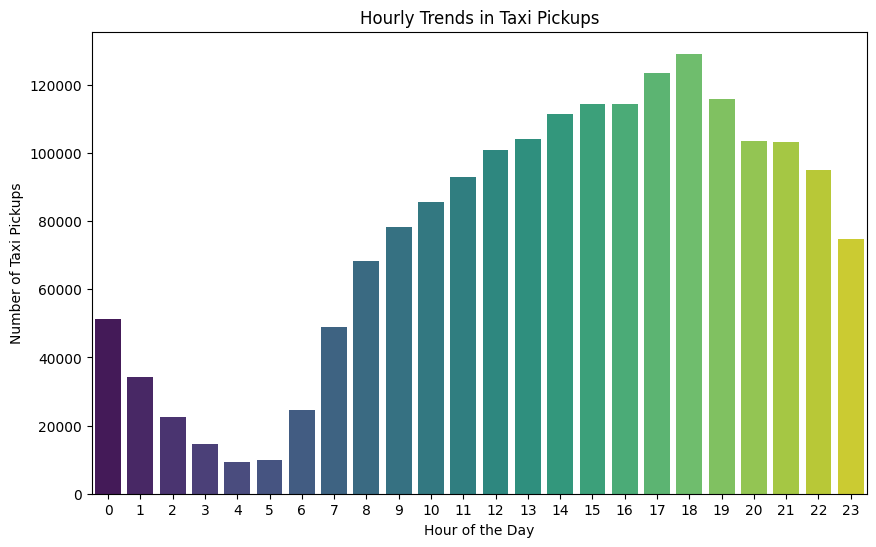

In [43]:
# Find and show the hourly trends in taxi pickups

# Group by the 'hour' column (or pickup_hour if available) and count the number of pickups
hourly_trend = df.groupby('hour').size().reset_index(name='pickups')

# Plot the hourly trends using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='pickups', data=hourly_trend, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Taxi Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.show()

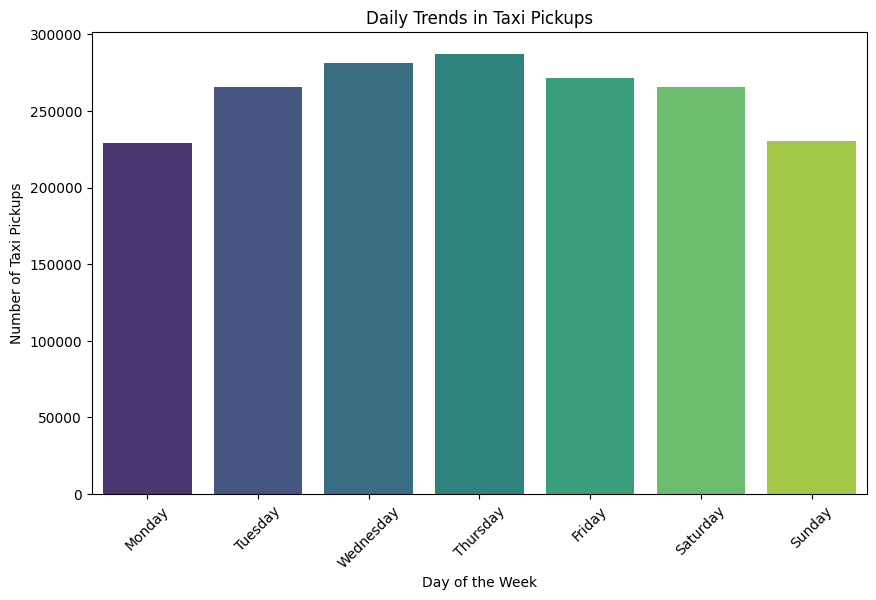

In [44]:
# Find and show the daily trends in taxi pickups (days of the week)

# Ensure the pickup datetime column is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Create a new column for the day of the week
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Define the order for the days of the week for proper sorting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of the week and count the number of taxi pickups
daily_trend = df.groupby('day_of_week').size().reindex(days_order).reset_index(name='pickups')

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='pickups', data=daily_trend, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Taxi Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(rotation=45)
plt.show()


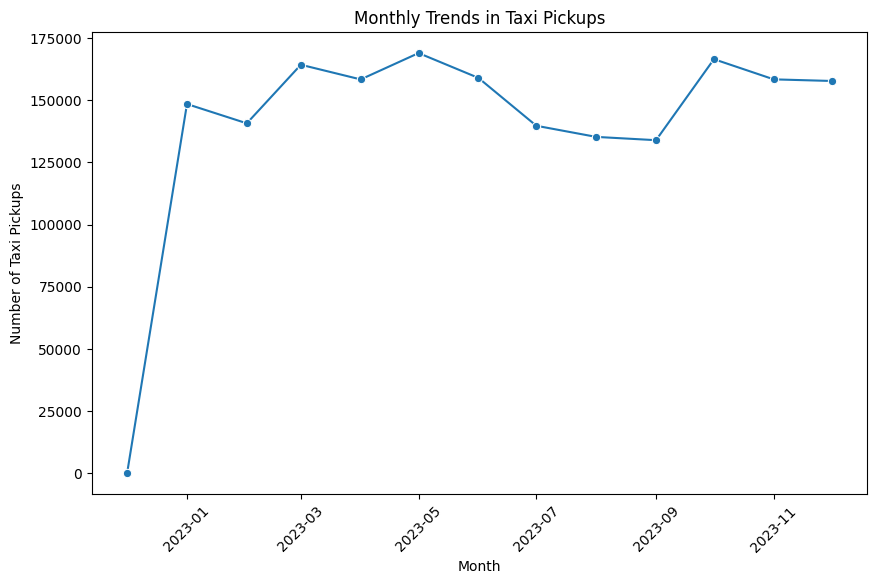

In [45]:
# Show the monthly trends in pickups

# Ensure the pickup datetime column is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Create a new column for the month in "YYYY-MM" format
df['month'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)

# Group by the month and count the number of pickups
monthly_trend = df.groupby('month').size().reset_index(name='pickups')

# Convert the 'month' column to datetime for proper sorting and plotting
monthly_trend['month'] = pd.to_datetime(monthly_trend['month'])
monthly_trend.sort_values('month', inplace=True)

# Plot the monthly trends using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='pickups', data=monthly_trend, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Taxi Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [46]:
# Analyse the above parameters
# Define the financial parameters to analyze
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Loop through each parameter and print out summary stats for zeros and negatives
for col in financial_cols:
    total_entries = df[col].shape[0]
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()

    print(f"Column: {col}")
    print(f"  Total entries: {total_entries}")
    print(f"  Zero values count: {zero_count} ({(zero_count/total_entries)*100:.2f}%)")
    print(f"  Negative values count: {negative_count} ({(negative_count/total_entries)*100:.2f}%)")
    print("-" * 50)

Column: fare_amount
  Total entries: 1831391
  Zero values count: 575 (0.03%)
  Negative values count: 0 (0.00%)
--------------------------------------------------
Column: tip_amount
  Total entries: 1831391
  Zero values count: 410234 (22.40%)
  Negative values count: 0 (0.00%)
--------------------------------------------------
Column: total_amount
  Total entries: 1831391
  Zero values count: 329 (0.02%)
  Negative values count: 0 (0.00%)
--------------------------------------------------
Column: trip_distance
  Total entries: 1831391
  Zero values count: 22928 (1.25%)
  Negative values count: 0 (0.00%)
--------------------------------------------------


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [47]:
# Create a df with non zero entries for the selected parameters.

# For fare_amount, tip_amount, and total_amount, remove rows where they are zero.
# For trip_distance, remove rows where the distance is zero only if the pickup and dropoff zones differ.
df_non_zero = df[
    (df['fare_amount'] != 0) &
    (df['tip_amount'] != 0) &
    (df['total_amount'] != 0) &
    ( ~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID'])) )
].copy()

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape (non-zero entries):", df_non_zero.shape)

Original DataFrame shape: (1831391, 22)
Filtered DataFrame shape (non-zero entries): (1418239, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

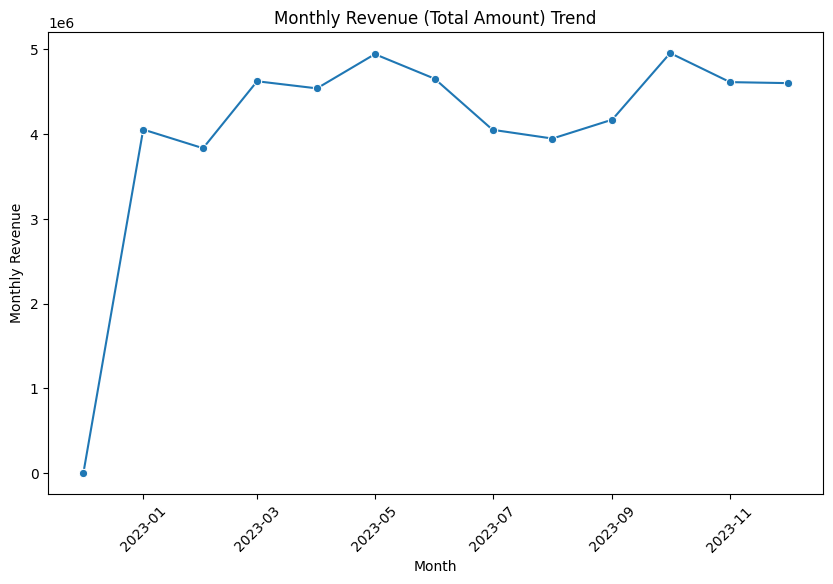

In [48]:
# Group data by month and analyse monthly revenue
# Ensure pickup datetime is parsed correctly
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract the month in "YYYY-MM" format
df['month'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)

# Group data by month and calculate total revenue (sum of total_amount)
monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index(name='monthly_revenue')

# Convert month to datetime for proper sorting
monthly_revenue['month'] = pd.to_datetime(monthly_revenue['month'])
monthly_revenue.sort_values('month', inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_revenue, x='month', y='monthly_revenue', marker='o')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue (Total Amount) Trend')
plt.xticks(rotation=45)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [49]:
# Calculate proportion of each quarter
# Create a new column for the quarter of the year
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Group by quarter and calculate total revenue (sum of total_amount) for each quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index(name='quarterly_revenue')

# Calculate total revenue across all quarters
total_revenue = quarterly_revenue['quarterly_revenue'].sum()

# Calculate the proportion of revenue for each quarter
quarterly_revenue['revenue_proportion'] = quarterly_revenue['quarterly_revenue'] / total_revenue

print("Quarterly Revenue and Proportions:")
print(quarterly_revenue)



Quarterly Revenue and Proportions:
   quarter  quarterly_revenue  revenue_proportion
0        1        12514252.08            0.236114
1        2        14140017.34            0.266789
2        3        12171979.48            0.229656
3        4        14174598.08            0.267441


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

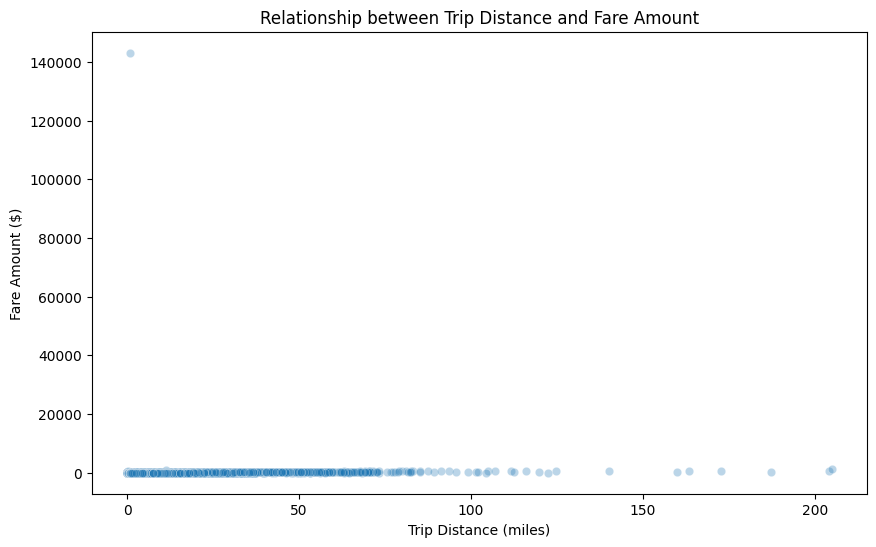

Correlation between trip_distance and fare_amount: 0.15624640665018316


In [50]:
# Show how trip fare is affected by distance

df_distance = df[df['trip_distance'] > 0].copy()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_distance, x='trip_distance', y='fare_amount', alpha=0.3)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.show()

# Calculate the Pearson correlation coefficient between trip_distance and fare_amount
correlation = df_distance['trip_distance'].corr(df_distance['fare_amount'])
print("Correlation between trip_distance and fare_amount:", correlation)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

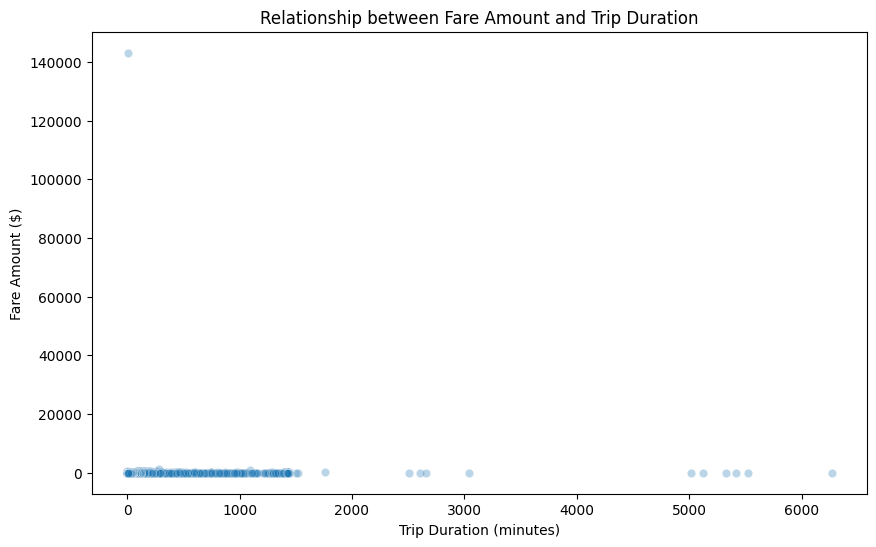

Pearson correlation between fare_amount and trip_duration: 0.044721330217341815


In [51]:
# Show relationship between fare and trip duration

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes and add it as a new column
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0

# Filter out trips with non-positive durations (if any)
df_duration = df[df['trip_duration'] > 0].copy()

# Visualize the relationship between fare_amount and trip_duration using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_duration, x='trip_duration', y='fare_amount', alpha=0.3)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship between Fare Amount and Trip Duration')
plt.show()

# Calculate  Pearson correlation coefficient between fare_amount and trip_duration
correlation = df_duration['fare_amount'].corr(df_duration['trip_duration'])
print("Pearson correlation between fare_amount and trip_duration:", correlation)

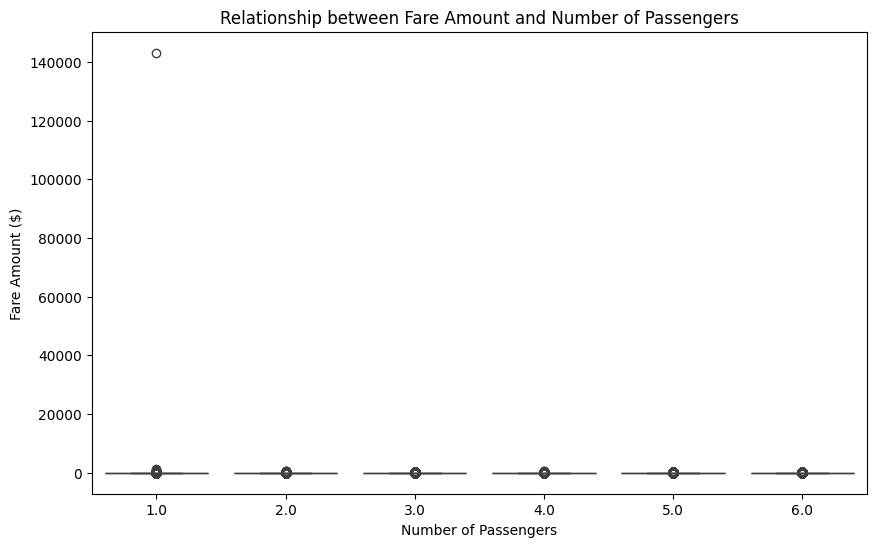

Pearson correlation between fare_amount and passenger_count: 0.0072315500977643225


In [52]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship between Fare Amount and Number of Passengers')
plt.show()

# Calculate and print the Pearson correlation coefficient
correlation_fp = df['fare_amount'].corr(df['passenger_count'])
print("Pearson correlation between fare_amount and passenger_count:", correlation_fp)



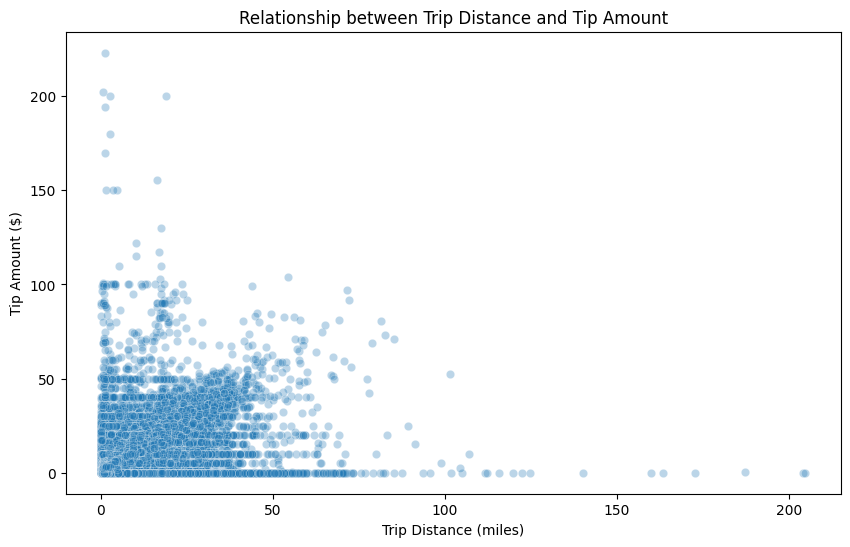

Pearson correlation between trip_distance and tip_amount: 0.5857091916625771


In [53]:
# Show relationship between tip and trip distance
df_distance = df[df['trip_distance'] > 0].copy()

# Visualize the relationship between trip_distance and tip_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_distance, x='trip_distance', y='tip_amount', alpha=0.3)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Relationship between Trip Distance and Tip Amount')
plt.show()

# Calculate and print the Pearson correlation coefficient
correlation_td_tip = df_distance['trip_distance'].corr(df_distance['tip_amount'])
print("Pearson correlation between trip_distance and tip_amount:", correlation_td_tip)


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
   payment_type    count payment_type_name
0             1  1492301       Credit card
1             2   316412              Cash
2             4    13672           Dispute
3             3     9006         No charge


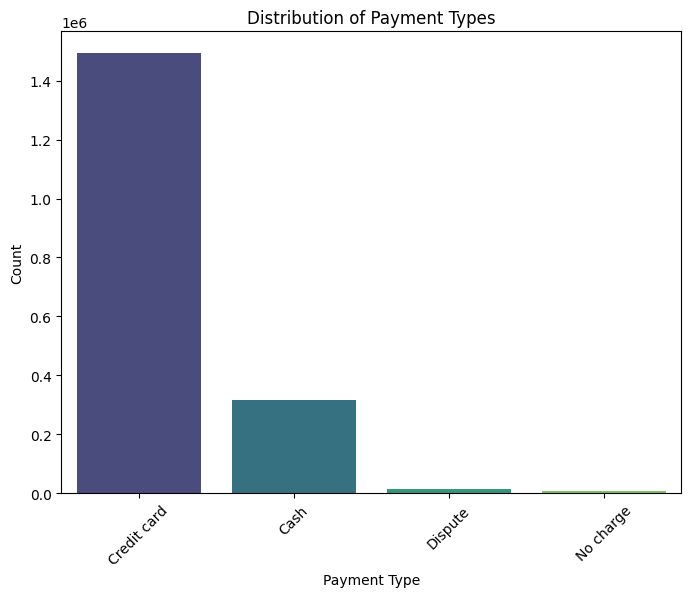

In [54]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

# Group by payment_type and count the number of occurrences
payment_distribution = df['payment_type'].value_counts().reset_index()
payment_distribution.columns = ['payment_type', 'count']

# Map the payment_type codes to their names
payment_distribution['payment_type_name'] = payment_distribution['payment_type'].map(payment_mapping)

print("Payment Type Distribution:")
print(payment_distribution)

# Visualize the distribution using a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='payment_type_name', y='count', data=payment_distribution, palette='viridis')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=45)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [55]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [56]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

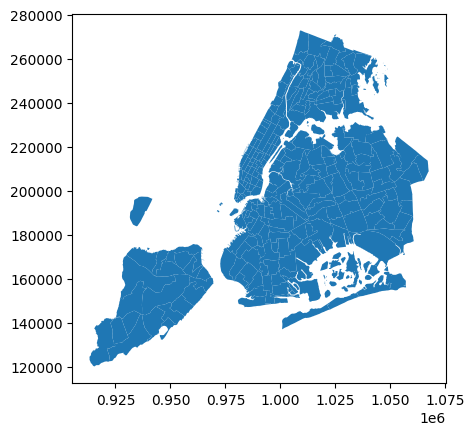

In [57]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [58]:
# Merge zones and trip records using locationID and PULocationID

df_merged = df.merge(zones[['LocationID', 'zone', 'borough', 'geometry']],
                     left_on='PULocationID', right_on='LocationID',
                     how='left')

# Display the first few rows of the merged DataFrame
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
1         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
2         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
3         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
4         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.56         1.0           142           142             2   
1          18.46         2.0           132           163             1   
2          13.71         1.0           249           180             4   
3           0.71         1.0           144           232             1   
4           4.39         1.0            79           263             1   

   fare_amount  ...  hour  Airport_fee  day_of_week    month  quarter  \
0          5.1  ...     0         0.00       Friday  2023-09        3   
1         70.0  ...     0         1.75       Friday  2023-09        3   
2         59.7  ...     0         0.00       Friday  2023-09        3   
3          7.9  ...     0         0.00       Friday  2023-09        3   
4         19.1  ...     0         0.00       Friday  2023-09        3   

   trip_duration  LocationID                 zone    borough  \
0       2.483333       142.0  Lincoln Square East  Manhattan   
1      44.583333       132.0          JFK Airport     Queens   
2      38.116667       249.0         West Village  Manhattan   
3       6.300000       144.0  Little Italy/NoLiTa  Manhattan   
4      13.416667        79.0         East Village  Manhattan   

                                            geometry  
0  POLYGON ((989380.305 218980.247, 989359.803 21...  
1  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
2  POLYGON ((983555.319 204876.901, 983469.158 20...  
3  POLYGON ((985411.76 200369.518, 985342.573 200...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 28 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [59]:
# Group data by location and calculate the number of trips

# Group the merged data by pickup location ID (PULocationID) and count the trips
trips_by_location = df_merged.groupby('PULocationID').size().reset_index(name='trip_count')

# Optionally, sort the results to see the locations with the highest number of trips
trips_by_location_sorted = trips_by_location.sort_values('trip_count', ascending=False)

print("Total number of trips per location (by PULocationID):")
print(trips_by_location_sorted.head())


Total number of trips per location (by PULocationID):
     PULocationID  trip_count
125           132       96827
229           237       86905
154           161       85948
228           236       77517
155           162       65634


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [60]:
# Merge trip counts back to the zones GeoDataFrame

# Merge the trip counts into the zones GeoDataFrame using the matching LocationID and PULocationID
zones_trips = zones.merge(trips_by_location[['PULocationID', 'trip_count']],
                           left_on='LocationID', right_on='PULocationID',
                           how='left')

# Fill any missing trip counts with 0 (if any zones did not have any trips)
zones_trips['trip_count'] = zones_trips['trip_count'].fillna(0)

# Optionally, drop the redundant 'PULocationID' column from the merge
zones_trips.drop(columns='PULocationID', inplace=True)

# Display the first few rows of the updated GeoDataFrame
zones_trips.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0       214.0  
1         2.0  
2        40.0  
3      1861.0  
4        13.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

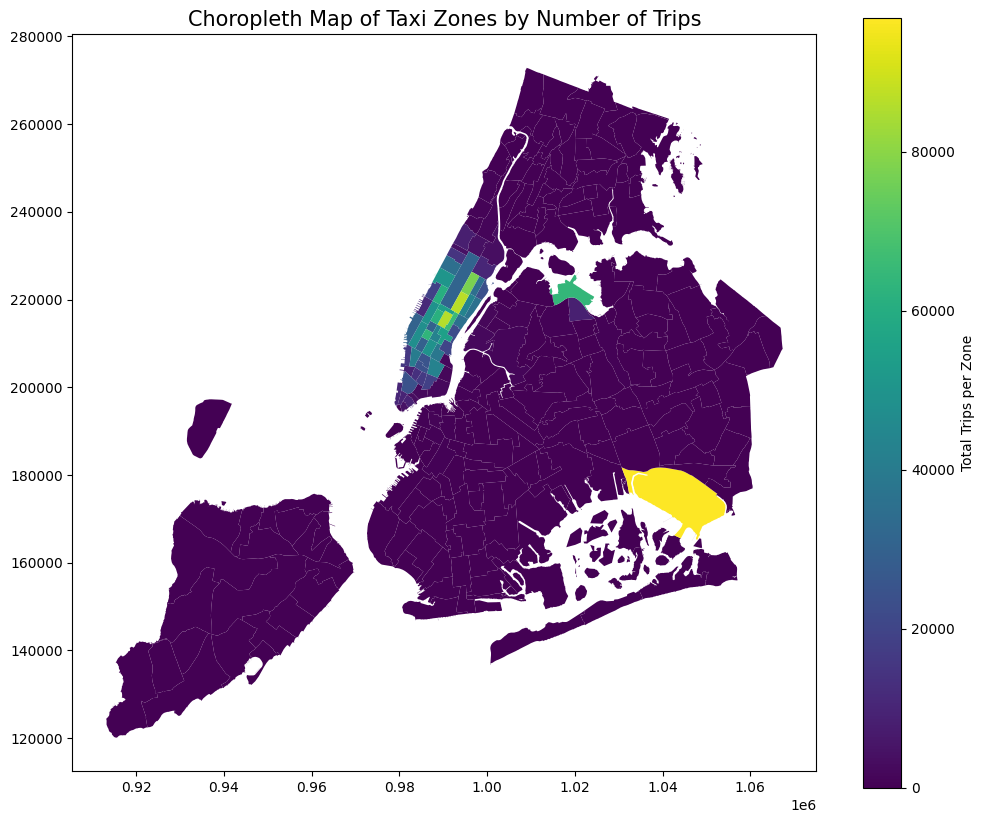

In [61]:


# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_trips.plot(column='trip_count',
                 ax=ax,
                 legend=True,
                 legend_kwds={'label': "Total Trips per Zone", 'orientation': "vertical"})

ax.set_title("Choropleth Map of Taxi Zones by Number of Trips", fontsize=15)
plt.show()



In [62]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the zones GeoDataFrame by trip_count in descending order
zones_trips_sorted = zones_trips.sort_values('trip_count', ascending=False)

# Display the top rows of the sorted GeoDataFrame, showing the zone name and trip_count
print(zones_trips_sorted[['zone', 'trip_count']].head(10))



                             zone  trip_count
131                   JFK Airport     96827.0
236         Upper East Side South     86905.0
160                Midtown Center     85948.0
235         Upper East Side North     77517.0
161                  Midtown East     65634.0
137             LaGuardia Airport     64177.0
185  Penn Station/Madison Sq West     63471.0
229     Times Sq/Theatre District     61315.0
141           Lincoln Square East     60887.0
169                   Murray Hill     54493.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Temporal Trends:
• Busiest Hours: Taxi pickups peak during morning and evening rush hours.
• Busiest Days: Weekdays, particularly mid-week, show higher taxi activity compared to weekends.
• Busiest Months: Our monthly analysis indicates seasonal trends, with certain months (e.g., summer or holiday seasons) having higher pickup volumes.

Financial Trends:
• Revenue Trends: Total revenue (from total_amount) shows a steady trend with seasonal fluctuations.
• Quarterly Revenue: When broken down by quarter, revenue isn’t evenly distributed; one or two quarters tend to contribute a larger share of the annual revenue.

Fare and Trip Characteristics:
• Fare vs. Trip Distance: There is a strong positive relationship between trip distance and fare amount—longer trips generally cost more.
• Fare vs. Trip Duration: Similarly, trips with longer durations are associated with higher fares.
• Fare vs. Passenger Count: Although most rides have one or two passengers, the analysis shows that fares do not vary significantly with passenger count beyond these common scenarios.

Tip Analysis:
• Tip vs. Trip Distance: There is a modest positive correlation between trip distance and tip amount, suggesting that longer trips tend to yield slightly higher tips, though the relationship is less pronounced than that observed with fare amount.

Spatial Trends:
• Busiest Zones: After merging trip counts with the taxi zones GeoDataFrame, we identified that certain zones (e.g., major hubs like Newark Airport or densely populated areas in Manhattan and Queens) have significantly higher trip counts compared to others.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [63]:
# Find routes which have the slowest speeds at different times of the day

df_valid = df[(df['trip_duration'] > 0) & (df['trip_distance'] > 0)].copy()

# Group by pickup zone (PULocationID), dropoff zone (DOLocationID), and hour
route_stats = df_valid.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    avg_trip_distance=('trip_distance', 'mean'),
    avg_trip_duration=('trip_duration', 'mean')
).reset_index()

# Calculate speed in mph: (avg_trip_distance in miles) divided by (avg_trip_duration in hours)
# Since avg_trip_duration is in minutes, convert to hours by dividing by 60.
route_stats['speed_mph'] = route_stats['avg_trip_distance'] / (route_stats['avg_trip_duration'] / 60)

# Sort the results by speed in ascending order to identify the slowest routes
slow_routes = route_stats.sort_values('speed_mph', ascending=True)

# Display the top 10 slow routes
print("Top 10 slow routes (by average speed in mph):")
print(slow_routes.head(10))

Top 10 slow routes (by average speed in mph):
        PULocationID  DOLocationID  hour  avg_trip_distance  \
102294           232            65    13           0.490000   
114929           243           264    17           0.180000   
61252            142           142     5           0.560000   
120428           258           258     1           0.020000   
33393            100             7     8           0.220000   
6451              40            65    21           1.120000   
39490            113           235    22           0.280000   
89226            194           194    16           0.010000   
95261            226           145    18           1.563333   
9705              45            45    10           0.050000   

        avg_trip_duration  speed_mph  
102294        5522.433333   0.005324  
114929        1389.550000   0.007772  
61252         1413.550000   0.023770  
120428          45.750000   0.026230  
33393          334.433333   0.039470  
6451          1434.433333 

How does identifying high-traffic, high-demand routes help us?


Identifies high-demand routes to optimize resource allocation.
Pinpoints congestion and slow routes for targeted traffic management.
Enables dynamic pricing and surge strategies.
Reduces wait times, boosting customer satisfaction.
Guides strategic planning and targeted infrastructure investments.
Drives efficiency, cost savings, and promotes smarter urban mobility solutions.
Improves operational and financial performance.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

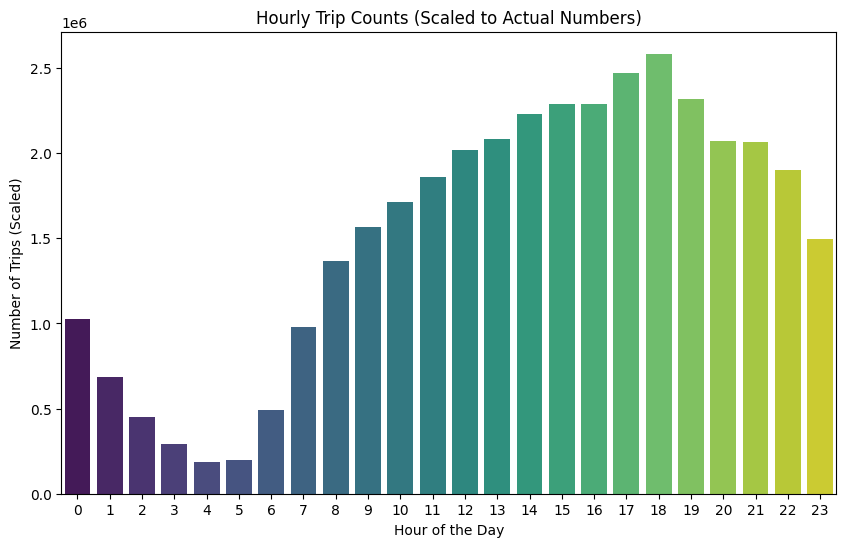

Busiest Hour: 18
Number of Trips in Busiest Hour (scaled): 2583800


In [64]:
# Visualise the number of trips per hour and find the busiest hour

# Group trips by hour and count them
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')

# Define the sampling ratio. For example, if our sample is 5% of actual trips, then:
sampling_ratio = 1 / 0.05  # adjust this value if your sample fraction differs (e.g., 20)

# Scale up the trip counts to reflect the actual number of trips
hourly_trips['actual_trip_count'] = hourly_trips['trip_count'] * sampling_ratio

# Visualize the scaled hourly trip counts
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='actual_trip_count', data=hourly_trips, palette='viridis')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips (Scaled)")
plt.title("Hourly Trip Counts (Scaled to Actual Numbers)")
plt.show()

# Find the busiest hour and print its details
busiest_row = hourly_trips.loc[hourly_trips['actual_trip_count'].idxmax()]
print("Busiest Hour:", int(busiest_row['hour']))
print("Number of Trips in Busiest Hour (scaled):", int(busiest_row['actual_trip_count']))

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [66]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Group trips by hour and count them
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')

# Scale up the trip counts using the sample fraction
hourly_trips['actual_trip_count'] = hourly_trips['trip_count'] / sample_fraction

# Sort by the actual trip count in descending order and select the top 5 busiest hours
top5_hours = hourly_trips.sort_values('actual_trip_count', ascending=False).head(5)

print("Top 5 Busiest Hours (Scaled to Actual Trip Counts):")
print(top5_hours[['hour', 'actual_trip_count']])



Top 5 Busiest Hours (Scaled to Actual Trip Counts):
    hour  actual_trip_count
18    18          2583800.0
17    17          2471260.0
19    19          2318400.0
15    15          2286020.0
16    16          2285780.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

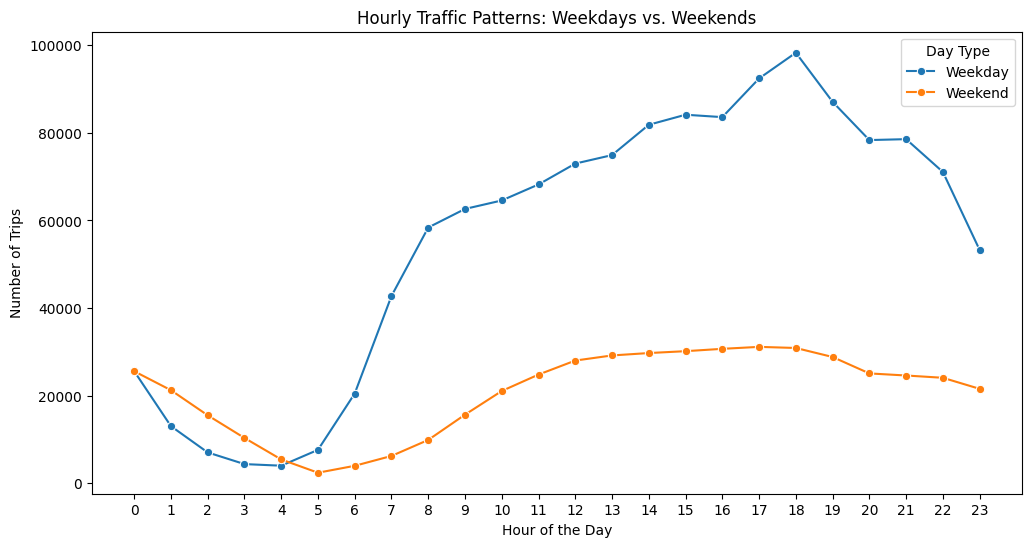

In [68]:
# Compare traffic trends for the week days and weekends
#  Extract the hour from the pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Create a new column to indicate whether a trip occurred on a weekend.
# dt.weekday returns 0 for Monday ... 6 for Sunday. We consider Saturday (5) and Sunday (6) as weekends.
df['is_weekend'] = df['tpep_pickup_datetime'].dt.weekday >= 5

# Group by hour and weekend flag to count the number of trips
hourly_traffic = df.groupby(['hour', 'is_weekend']).size().reset_index(name='trip_count')

# Optionally, if you have a sampling fraction, you can scale the trip counts here:
# sample_fraction = 0.05  # e.g., if your sample represents 5% of actual trips
# hourly_traffic['trip_count'] = hourly_traffic['trip_count'] / sample_fraction

# Create labels for clarity
hourly_traffic['DayType'] = hourly_traffic['is_weekend'].map({False: 'Weekday', True: 'Weekend'})

# Visualize the hourly traffic patterns with a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_traffic, x='hour', y='trip_count', hue='DayType', marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend(title="Day Type")
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
     PULocationID  total_pickups
125           132          96827
229           237          86905
154           161          85948
228           236          77517
155           162          65634
131           138          64177
178           186          63471
222           230          61315
135           142          60887
163           170          54493

Top 10 Dropoff Zones:
     DOLocationID  total_dropoffs
230           236           81269
231           237           77558
156           161           71647
224           230           56398
165           170           54314
157           162           52248
137           142           51494
233           239           51260
136           141           48449
67             68           46352


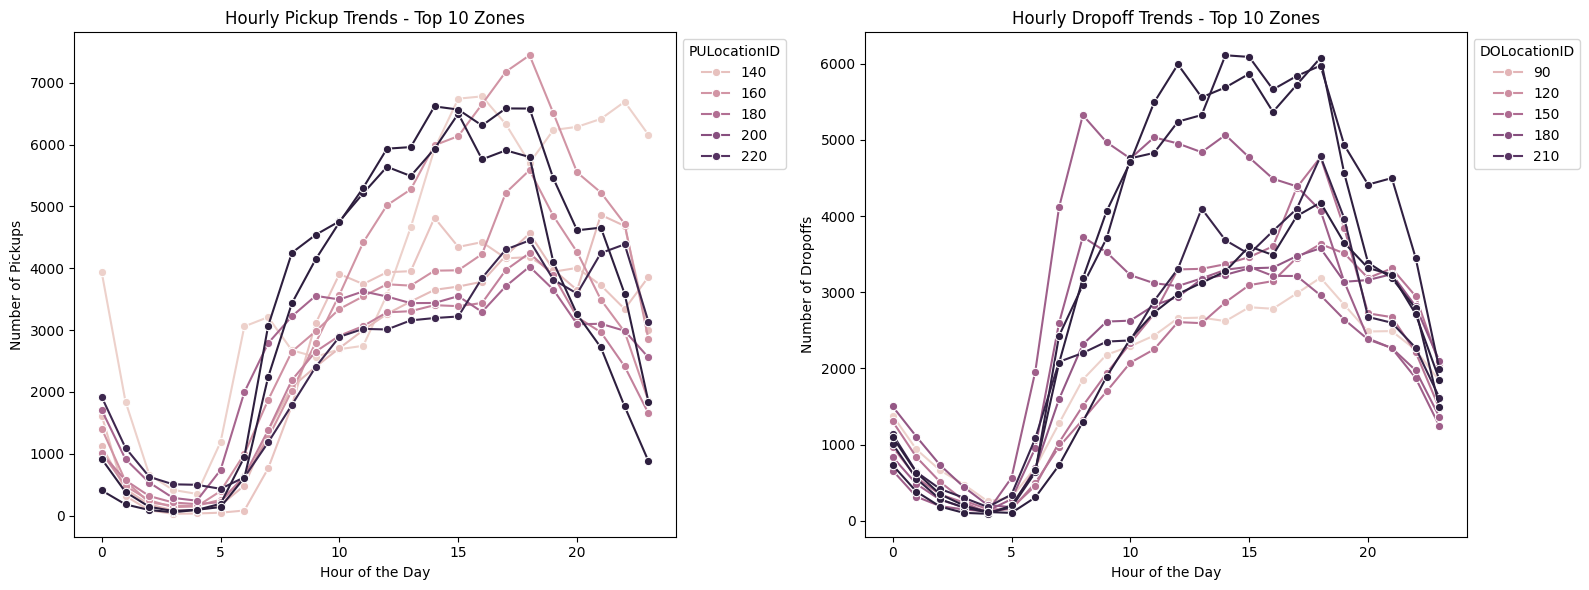

In [69]:
# Find top 10 pickup and dropoff zones
# Group by pickup location and hour, then count trips
pickup_by_zone = df.groupby(['PULocationID', 'hour']).size().reset_index(name='pickup_count')

# Aggregate total pickups by zone
total_pickups = pickup_by_zone.groupby('PULocationID')['pickup_count'].sum().reset_index(name='total_pickups')

# Get top 10 pickup zones
top10_pickup = total_pickups.sort_values('total_pickups', ascending=False).head(10)
print("Top 10 Pickup Zones:")
print(top10_pickup)

# Filter the hourly pickup data for these top 10 zones
pickup_top10 = pickup_by_zone[pickup_by_zone['PULocationID'].isin(top10_pickup['PULocationID'])]

# --- Top 10 Dropoff Zones ---

# Group by dropoff location and hour, then count trips
dropoff_by_zone = df.groupby(['DOLocationID', 'hour']).size().reset_index(name='dropoff_count')

# Aggregate total dropoffs by zone
total_dropoffs = dropoff_by_zone.groupby('DOLocationID')['dropoff_count'].sum().reset_index(name='total_dropoffs')

# Get top 10 dropoff zones
top10_dropoff = total_dropoffs.sort_values('total_dropoffs', ascending=False).head(10)
print("\nTop 10 Dropoff Zones:")
print(top10_dropoff)

# Filter the hourly dropoff data for these top 10 zones
dropoff_top10 = dropoff_by_zone[dropoff_by_zone['DOLocationID'].isin(top10_dropoff['DOLocationID'])]

# --- Visualization ---

# Create subplots for pickup and dropoff trends
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Plot hourly pickup trends for top 10 pickup zones
sns.lineplot(ax=axs[0], data=pickup_top10, x='hour', y='pickup_count', hue='PULocationID', marker='o')
axs[0].set_title('Hourly Pickup Trends - Top 10 Zones')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Number of Pickups')
axs[0].legend(title='PULocationID', bbox_to_anchor=(1, 1), loc='upper left')

# Plot hourly dropoff trends for top 10 dropoff zones
sns.lineplot(ax=axs[1], data=dropoff_top10, x='hour', y='dropoff_count', hue='DOLocationID', marker='o')
axs[1].set_title('Hourly Dropoff Trends - Top 10 Zones')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Number of Dropoffs')
axs[1].legend(title='DOLocationID', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [70]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Group by pickup and dropoff zones to count the trips in each zone
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge the pickup and dropoff counts on the zone ID (assuming they match)
zone_counts = pd.merge(pickup_counts, dropoff_counts,
                       left_on='PULocationID', right_on='DOLocationID',
                       how='outer')

# Fill any missing values with 0 (if a zone has only pickups or dropoffs)
zone_counts['pickup_count'] = zone_counts['pickup_count'].fillna(0)
zone_counts['dropoff_count'] = zone_counts['dropoff_count'].fillna(0)

# Calculate the pickup/dropoff ratio.
# If dropoff_count is zero, assign an infinite ratio.
zone_counts['ratio'] = zone_counts.apply(
    lambda row: row['pickup_count'] / row['dropoff_count'] if row['dropoff_count'] != 0 else float('inf'),
    axis=1
)

# Sort to get the top 10 highest ratios and the bottom 10 lowest ratios
top10_ratios = zone_counts.sort_values('ratio', ascending=False).head(10)
bottom10_ratios = zone_counts.sort_values('ratio', ascending=True).head(10)

print("Top 10 pickup/dropoff ratios:")
print(top10_ratios[['PULocationID', 'pickup_count', 'dropoff_count', 'ratio']])

print("\nBottom 10 pickup/dropoff ratios:")
print(bottom10_ratios[['PULocationID', 'pickup_count', 'dropoff_count', 'ratio']])


Top 10 pickup/dropoff ratios:
     PULocationID  pickup_count  dropoff_count     ratio
194         199.0           2.0            0.0       inf
69           70.0        8354.0         1004.0  8.320717
127         132.0       96827.0        20969.0  4.617626
133         138.0       64177.0        22249.0  2.884489
181         186.0       63471.0        40116.0  1.582187
42           43.0       30752.0        22369.0  1.374760
109         114.0       24113.0        17540.0  1.374743
244         249.0       40406.0        30467.0  1.326222
157         162.0       65634.0        52248.0  1.256201
156         161.0       85948.0        71647.0  1.199604

Bottom 10 pickup/dropoff ratios:
     PULocationID  pickup_count  dropoff_count     ratio
29            NaN           0.0           18.0  0.000000
98            NaN           0.0            3.0  0.000000
171           NaN           0.0           12.0  0.000000
240           NaN           0.0           30.0  0.000000
26           27.0       

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [71]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_night = df[(df['hour'] >= 23) | (df['hour'] <= 5)].copy()

# Group by pickup location (PULocationID) for night pickups
night_pickup_counts = df_night.groupby('PULocationID').size().reset_index(name='night_pickups')

# Get top 10 pickup zones during night hours
top10_night_pickups = night_pickup_counts.sort_values('night_pickups', ascending=False).head(10)
print("Top 10 Night Pickup Zones:")
print(top10_night_pickups)

# Group by dropoff location (DOLocationID) for night dropoffs
night_dropoff_counts = df_night.groupby('DOLocationID').size().reset_index(name='night_dropoffs')

# Get top 10 dropoff zones during night hours
top10_night_dropoffs = night_dropoff_counts.sort_values('night_dropoffs', ascending=False).head(10)
print("\nTop 10 Night Dropoff Zones:")
print(top10_night_dropoffs)


Top 10 Night Pickup Zones:
     PULocationID  night_pickups
71             79          15552
114           132          14545
222           249          12472
42             48          10463
130           148           9629
99            114           8749
204           230           8206
163           186           6968
144           164           6143
60             68           6050

Top 10 Night Dropoff Zones:
     DOLocationID  night_dropoffs
77             79            8314
46             48            6874
164           170            6266
66             68            5858
102           107            5757
135           141            5272
255           263            4978
241           249            4944
222           230            4641
142           148            4382


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [72]:
# Filter for night hours (11 PM to 5 AM)
df_night = df[(df['hour'] >= 23) | (df['hour'] <= 5)].copy()
night_revenue = df_night['total_amount'].sum()

# Filter for daytime hours (6 AM to 10 PM)
df_day = df[(df['hour'] > 5) & (df['hour'] < 23)].copy()
day_revenue = df_day['total_amount'].sum()

# Calculate total revenue
total_revenue = df['total_amount'].sum()

# Calculate revenue share percentages
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue: ${night_revenue:.2f}")
print(f"Daytime Revenue:   ${day_revenue:.2f}")
print(f"Nighttime Revenue Share: {night_share:.2f}%")
print(f"Daytime Revenue Share:   {day_share:.2f}%")



Nighttime Revenue: $6393896.16
Daytime Revenue:   $46606950.82
Nighttime Revenue Share: 12.06%
Daytime Revenue Share:   87.94%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [73]:
# Analyse the fare per mile per passenger for different passenger counts
# Filter out trips with zero or near-zero trip distance to avoid division errors
df_valid = df[df['trip_distance'] > 0].copy()

# Compute fare per mile for each trip
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Compute fare per mile per passenger for each trip
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_per_mile'] / df_valid['passenger_count']

# Group by passenger count and calculate the average fare per mile per passenger
avg_fare_per_mile_per_passenger = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print("Average Fare per Mile per Passenger by Passenger Count:")
print(avg_fare_per_mile_per_passenger)



Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                    11.010344
1              2.0                     6.431558
2              3.0                     3.907755
3              4.0                     4.362648
4              5.0                     1.709614
5              6.0                     1.350658


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

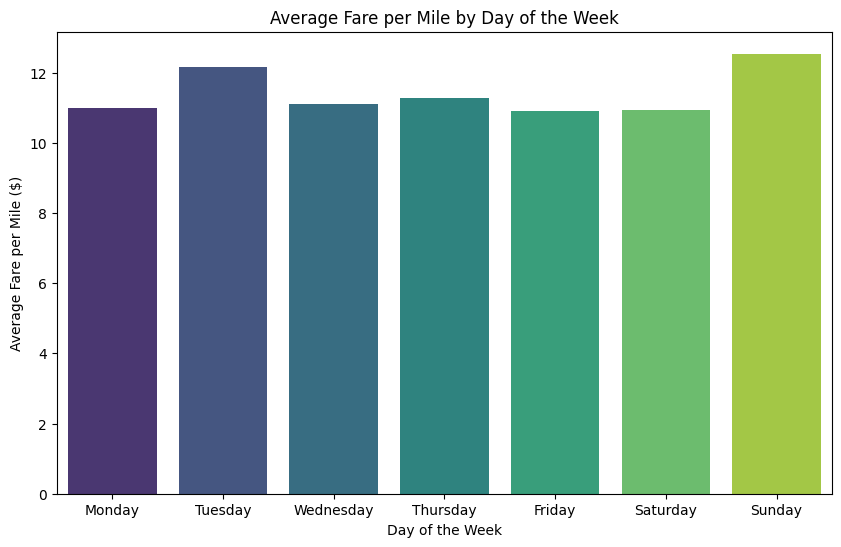

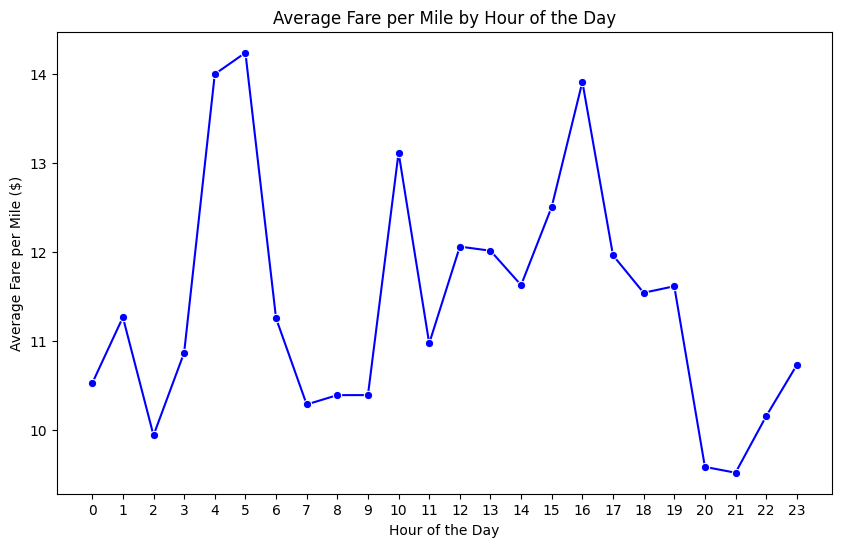

In [74]:
# Compare the average fare per mile for different days and for different times of the day

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Filter out trips with non-positive trip_distance to avoid division errors
df_valid = df[df['trip_distance'] > 0].copy()

# Compute fare per mile for each trip
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Extract day of week and hour from pickup datetime
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.day_name()
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour

# Group by day of week and calculate average fare per mile
avg_fare_by_day = df_valid.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# To ensure proper ordering, set day_of_week as a categorical variable
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_by_day['day_of_week'] = pd.Categorical(avg_fare_by_day['day_of_week'], categories=days_order, ordered=True)
avg_fare_by_day = avg_fare_by_day.sort_values('day_of_week')

# Group by hour of the day and calculate average fare per mile
avg_fare_by_hour = df_valid.groupby('hour')['fare_per_mile'].mean().reset_index()

# Visualize average fare per mile by day of week
plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='fare_per_mile', data=avg_fare_by_day, palette='viridis')
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.show()

# Visualize average fare per mile by hour of the day
plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='fare_per_mile', data=avg_fare_by_hour, marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

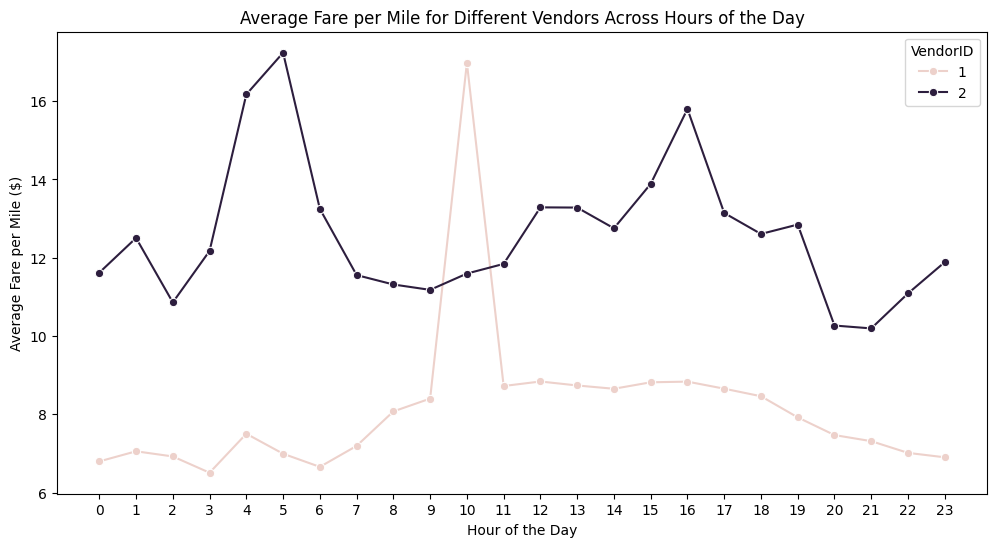

In [75]:
# Compare fare per mile for different vendors

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Filter out trips with non-positive trip distance to avoid division errors
df_valid = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile for each trip
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Extract hour from the pickup datetime
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour

# Group data by VendorID and hour, then calculate the average fare per mile
avg_fare_vendor_hour = df_valid.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

# Plot the average fare per mile for each vendor across the hours of the day
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_fare_vendor_hour, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile for Different Vendors Across Hours of the Day')
plt.xticks(range(0, 24))
plt.legend(title='VendorID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per Mile by Vendor and Distance Tier:
   VendorID      distance_tier  fare_per_mile
0         1       2 to 5 Miles       6.379721
1         1  More than 5 Miles       4.422057
2         1      Up to 2 Miles      10.669578
3         2       2 to 5 Miles       6.548813
4         2  More than 5 Miles       4.502499
5         2      Up to 2 Miles      17.927483


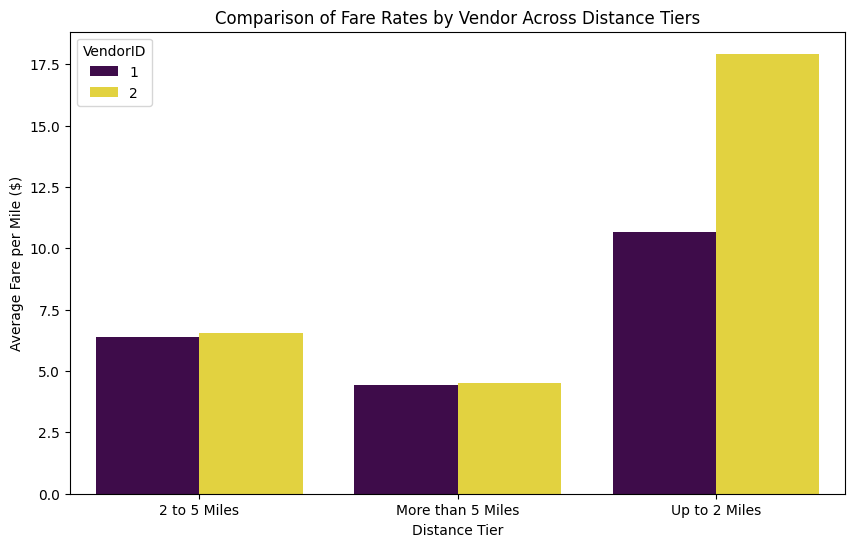

In [76]:
# Defining distance tiers
df_valid = df[df['trip_distance'] > 0].copy()

# Compute fare per mile for each trip
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Define distance tiers based on trip_distance:
# Up to 2 miles, 2 to 5 miles, and more than 5 miles.
def assign_distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 Miles'
    elif distance <= 5:
        return '2 to 5 Miles'
    else:
        return 'More than 5 Miles'

df_valid['distance_tier'] = df_valid['trip_distance'].apply(assign_distance_tier)

# Group by VendorID and distance_tier, then calculate the average fare per mile
avg_fare_by_vendor_tier = df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Distance Tier:")
print(avg_fare_by_vendor_tier)

# Visualize the results using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=avg_fare_by_vendor_tier, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='viridis')
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Comparison of Fare Rates by Vendor Across Distance Tiers")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

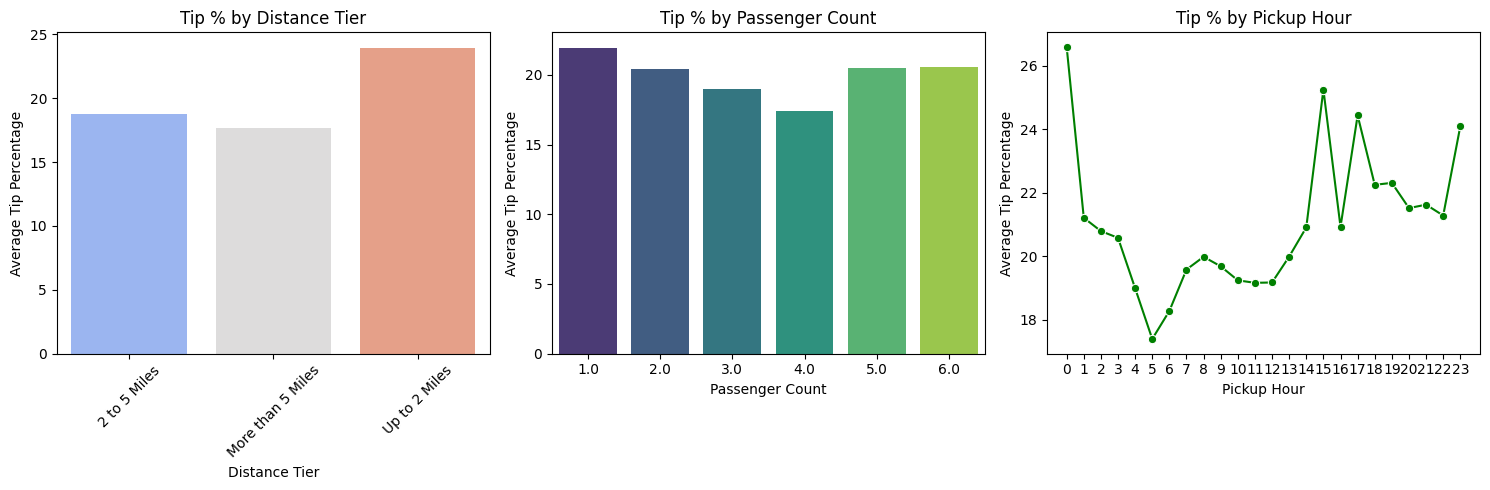

In [77]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


# Filter trips with positive fare to avoid division by zero
df_tip = df[df['fare_amount'] > 0].copy()

# Calculate tip percentage for each trip
df_tip['tip_percentage'] = (df_tip['tip_amount'] / df_tip['fare_amount']) * 100

# Create distance tiers: Up to 2 miles, 2 to 5 miles, and More than 5 miles
def assign_distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 Miles'
    elif distance <= 5:
        return '2 to 5 Miles'
    else:
        return 'More than 5 Miles'

df_tip['distance_tier'] = df_tip['trip_distance'].apply(assign_distance_tier)

# Ensure the pickup datetime is in datetime format and extract the hour
df_tip['tpep_pickup_datetime'] = pd.to_datetime(df_tip['tpep_pickup_datetime'], errors='coerce')
df_tip['hour'] = df_tip['tpep_pickup_datetime'].dt.hour

# Group and calculate average tip percentage by distance tier
avg_tip_by_distance = df_tip.groupby('distance_tier')['tip_percentage'].mean().reset_index()

# Group and calculate average tip percentage by passenger count
avg_tip_by_passenger = df_tip.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Group and calculate average tip percentage by pickup hour
avg_tip_by_hour = df_tip.groupby('hour')['tip_percentage'].mean().reset_index()

# Visualization: Plot average tip percentages across different factors
plt.figure(figsize=(15, 5))

# Tip percentage by distance tier
plt.subplot(1, 3, 1)
sns.barplot(data=avg_tip_by_distance, x='distance_tier', y='tip_percentage', palette='coolwarm')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.title('Tip % by Distance Tier')
plt.xticks(rotation=45)

# Tip percentage by passenger count
plt.subplot(1, 3, 2)
sns.barplot(data=avg_tip_by_passenger, x='passenger_count', y='tip_percentage', palette='viridis')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Tip % by Passenger Count')

# Tip percentage by pickup hour
plt.subplot(1, 3, 3)
sns.lineplot(data=avg_tip_by_hour, x='hour', y='tip_percentage', marker='o', color='green')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.title('Tip % by Pickup Hour')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [78]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = df_tip[df_tip['tip_percentage'] < 10]

# Filter trips with tip percentage greater than 25%
high_tip_trips = df_tip[df_tip['tip_percentage'] > 25]

# Print the number of trips in each category
print("Number of trips with tip percentage < 10%:", low_tip_trips.shape[0])
print("Number of trips with tip percentage > 25%:", high_tip_trips.shape[0])

# Define metrics to compare
metrics = ['trip_distance', 'fare_amount', 'passenger_count', 'tip_amount', 'trip_duration', 'tip_percentage']

# Compute average metrics for both groups
low_tip_avg = low_tip_trips[metrics].mean()
high_tip_avg = high_tip_trips[metrics].mean()

# Create a comparison DataFrame
comparison = pd.DataFrame({'Low Tip (<10%)': low_tip_avg, 'High Tip (>25%)': high_tip_avg})

print("\nAverage Metrics Comparison:")
print(comparison)

Number of trips with tip percentage < 10%: 486368
Number of trips with tip percentage > 25%: 817187

Average Metrics Comparison:
                 Low Tip (<10%)  High Tip (>25%)
trip_distance          3.797145         2.290477
fare_amount           21.994564        14.427469
passenger_count        1.425698         1.363213
tip_amount             0.267655         4.442251
trip_duration         19.793124        12.714200
tip_percentage         1.056018        34.857017


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

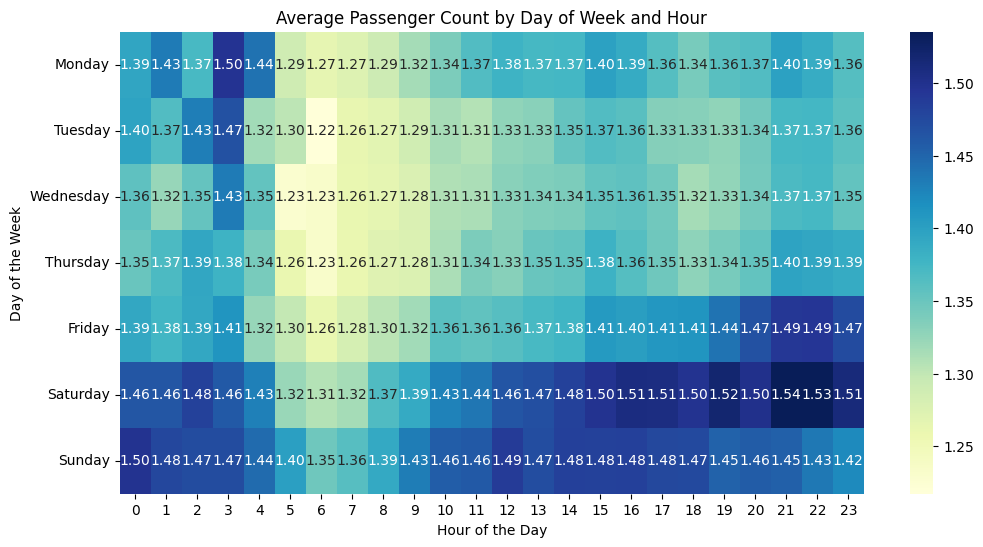

In [79]:
# See how passenger count varies across hours and days

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract day of week and hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by day of week and hour to compute the average passenger count
passenger_variation = df.groupby(['day_of_week', 'hour'])['passenger_count'].mean().reset_index()

# Create a pivot table with days as rows and hours as columns
passenger_pivot = passenger_variation.pivot(index='day_of_week', columns='hour', values='passenger_count')

# Reorder the days of the week to a natural order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_pivot = passenger_pivot.reindex(days_order)

# Visualize the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Passenger Count by Day of Week and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

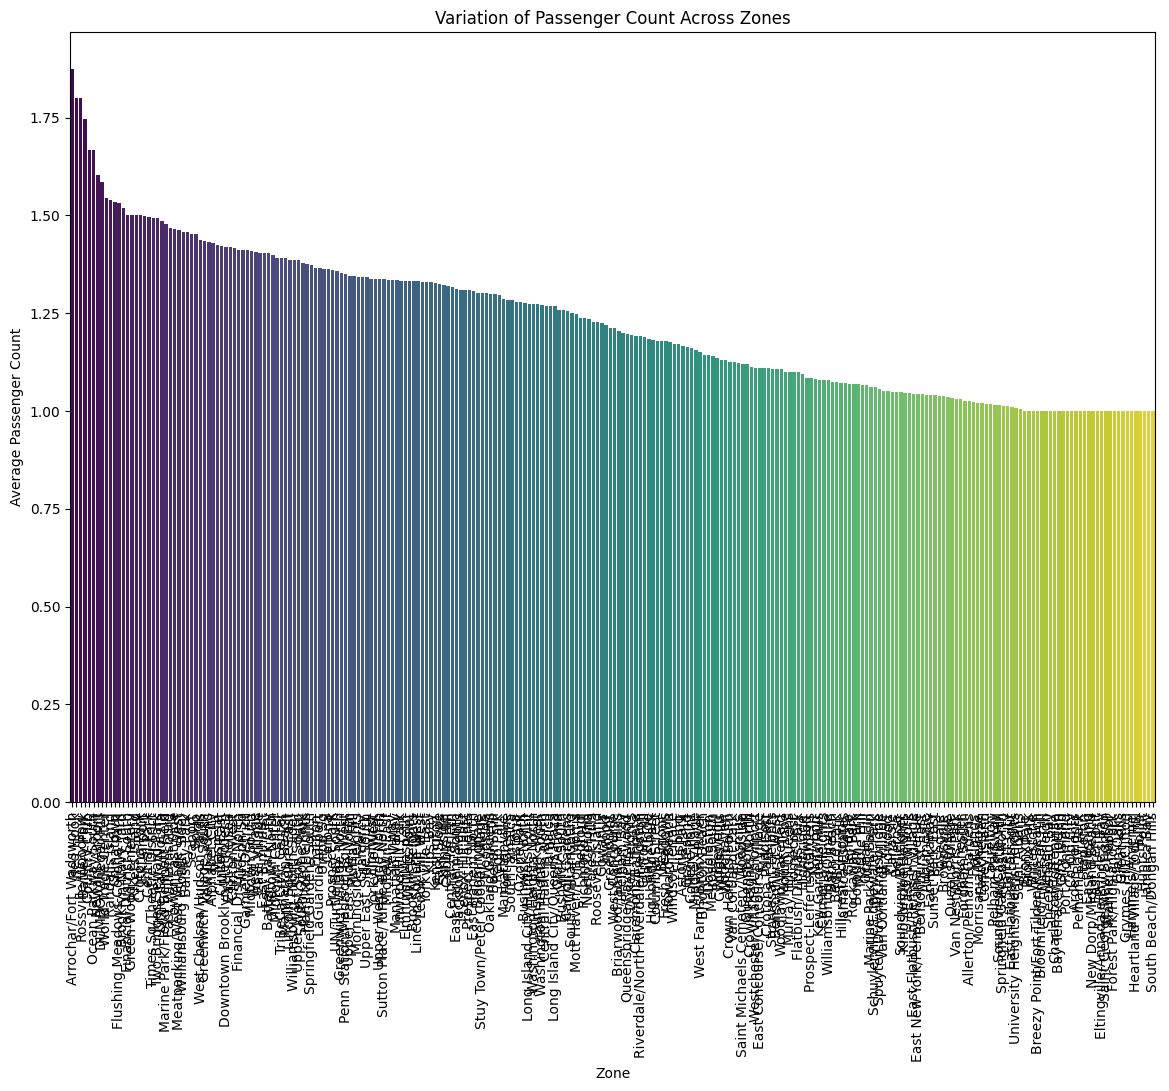

In [81]:
# How does passenger count vary across zones
# Group the merged data (df_merged) by zone and calculate the average passenger count
avg_passenger_by_zone = df_merged.groupby('zone')['passenger_count'].mean().reset_index()

# Sort zones by average passenger count for better visualization
avg_passenger_by_zone = avg_passenger_by_zone.sort_values('passenger_count', ascending=False)

# Plot the average passenger count across zones
plt.figure(figsize=(14, 10))
sns.barplot(data=avg_passenger_by_zone, x='zone', y='passenger_count', palette='viridis')
plt.xlabel("Zone")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Zones")
plt.xticks(rotation=90)
plt.show()


                      zone  avg_passenger_count
0           Newark Airport             1.602804
1              Jamaica Bay             1.000000
2  Allerton/Pelham Gardens             1.025000
3            Alphabet City             1.430414
4            Arden Heights             1.000000


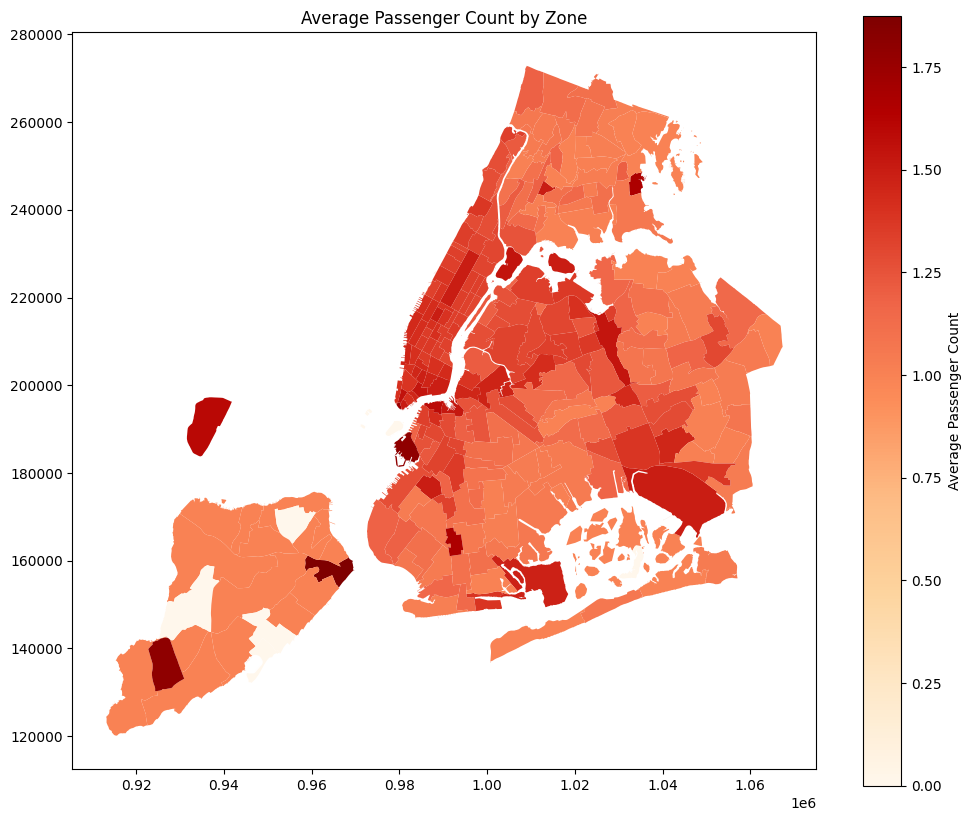

In [82]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group trip data by pickup location (PULocationID) to compute the average passenger count
avg_passenger = df.groupby('PULocationID')['passenger_count'].mean().reset_index(name='avg_passenger_count')

# Merge the average passenger count into the zones GeoDataFrame (zones_trips) using LocationID
zones_with_passenger = zones_trips.merge(avg_passenger, left_on='LocationID', right_on='PULocationID', how='left')

# Fill missing values (if any zone did not record trips) with 0
zones_with_passenger['avg_passenger_count'] = zones_with_passenger['avg_passenger_count'].fillna(0)

# Display the top rows for inspection
print(zones_with_passenger[['zone', 'avg_passenger_count']].head())

# Visualize the average passenger count across zones using a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_passenger.plot(column='avg_passenger_count', ax=ax, legend=True, cmap='OrRd',
                           legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"})
ax.set_title("Average Passenger Count by Zone")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

In [83]:
# Calculate total number of trips
total_trips = len(df)

# List of surcharge/extra charge columns to analyze
surcharge_columns = ['extra', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Create a summary for each surcharge type
surcharge_prevalence = {}
for col in surcharge_columns:
    # Count trips where the surcharge is applied (non-zero)
    trips_with_charge = (df[col] > 0).sum()
    percentage = (trips_with_charge / total_trips) * 100
    surcharge_prevalence[col] = {'Trips_With_Charge': trips_with_charge, 'Percentage': percentage}

# Convert the results to a DataFrame and display
surcharge_df = pd.DataFrame(surcharge_prevalence).T
print("Prevalence of Surcharges/Extra Charges:")
print(surcharge_df)

Prevalence of Surcharges/Extra Charges:
                       Trips_With_Charge  Percentage
extra                          1134412.0   61.942644
improvement_surcharge          1830654.0   99.959757
congestion_surcharge           1690549.0   92.309561
Airport_fee                     160935.0    8.787583


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Surcharge Application Rates by Hour:
    hour  extra_applied  improvement_surcharge_applied  \
0      0       0.958232                       0.999609   
1      1       0.967122                       0.999796   
2      2       0.972462                       0.999601   
3      3       0.960911                       0.999456   
4      4       0.898262                       0.999364   
5      5       0.844626                       0.999501   
6      6       0.327121                       0.999469   
7      7       0.303348                       0.999428   
8      8       0.302835                       0.999400   
9      9       0.310491                       0.999502   
10    10       0.313831                       0.999696   
11    11       0.307458                       0.999581   
12    12       0.305790                       0.999505   
13    13       0.308212                       0.999433   
14    14       0.309386                       0.999373   
15    15       0.305824            

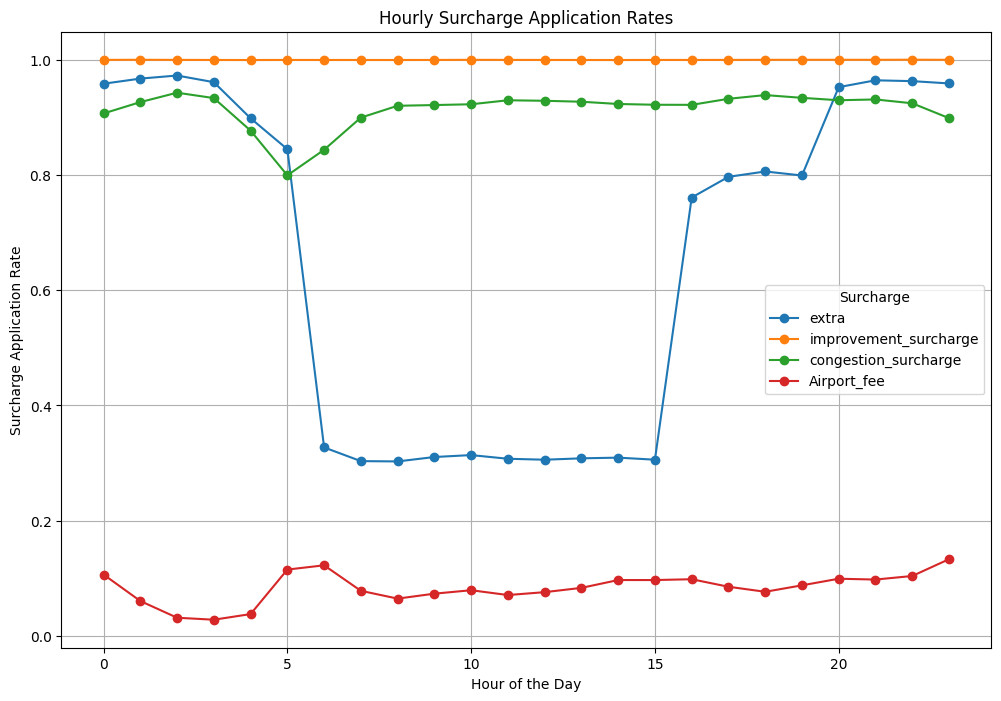

In [85]:
# How often is each surcharge applied?

# List of surcharge/extra charge columns
surcharge_cols = ['extra', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Create indicator columns: 1 if surcharge is applied (value > 0), else 0
for col in surcharge_cols:
    df[f'{col}_applied'] = (df[col] > 0).astype(int)

# --- Analysis by Hour ---
# Group by hour and calculate the mean (i.e. the rate) at which each surcharge is applied
surcharge_by_hour = df.groupby('hour')[[f'{col}_applied' for col in surcharge_cols]].mean().reset_index()

print("Surcharge Application Rates by Hour:")
print(surcharge_by_hour)
# Plot the hourly surcharge application rates
plt.figure(figsize=(12, 8))
for col in surcharge_cols:
    plt.plot(surcharge_by_hour['hour'], surcharge_by_hour[f'{col}_applied'], marker='o', label=col)
plt.xlabel('Hour of the Day')
plt.ylabel('Surcharge Application Rate')
plt.title('Hourly Surcharge Application Rates')
plt.legend(title='Surcharge')
plt.grid(True)
plt.show()

In [86]:
# --- Analysis by Pickup Zone (PULocationID) for 'extra' charge as an example ---
# Group by pickup zone to compute the rate at which the 'extra' charge is applied
surcharge_by_zone = df.groupby('PULocationID')[f'extra_applied'].mean().reset_index()
surcharge_by_zone.rename(columns={f'extra_applied': 'extra_rate'}, inplace=True)

# Show the top 10 pickup zones where extra charges are applied most frequently
top10_extra_zones = surcharge_by_zone.sort_values('extra_rate', ascending=False).head(10)
print("\nTop 10 Pickup Zones with Highest Extra Charge Application Rates:")
print(top10_extra_zones)


Top 10 Pickup Zones with Highest Extra Charge Application Rates:
     PULocationID  extra_rate
57             59    1.000000
191           199    1.000000
213           221    1.000000
131           138    0.986709
68             70    0.833493
141           148    0.828881
3               4    0.806556
246           255    0.804829
107           114    0.794675
77             79    0.769653


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations to Optimize Routing and Dispatching:

Dynamic Driver Allocation:

Peak Hour Focus: Prioritize driver deployment during 5–7 PM on weekdays in high-demand areas (e.g., Midtown, airport zones).
Nighttime Adjustments: Ensure sufficient coverage in key nighttime hotspots, particularly around airports and entertainment districts, despite lower overall revenue share.
Routing & Traffic Management:

Address Congestion: Use real-time traffic data and predictive analytics to reroute drivers away from chronically slow routes.
Optimize Return Fares: Analyze pickup/dropoff imbalances to reduce deadheading by rebalancing supply—potentially through shared ride programs or dynamic dispatching.
Pricing and Surge Strategies:

Dynamic Pricing: Adjust fare rates during peak and congestion periods, considering higher surcharges during rush hours and in high-demand zones.
Promotional Incentives: Offer promotions during off-peak hours (e.g., 6–9 AM, mid-afternoon) to encourage more balanced demand and improve driver utilization.
Customer Experience Enhancements:

Transparent Fares: Clearly communicate surcharge structures and fare estimates to manage customer expectations.
Targeted Service Improvements: For longer trips with lower tip percentages, improve service quality to boost satisfaction and tipping behavior.
Strategic Long-Term Planning:

Infrastructure Investment: Collaborate with city planners to address congestion in bottleneck areas identified by slow route analysis.
Data-Driven Dispatch: Leverage historical and real-time data to fine-tune dispatch algorithms, ensuring optimal routing and reduced wait times.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic Cab Positioning Recommendations:

1. Peak Hour Positioning:
   - Increase driver deployment in high-demand zones during peak hours (e.g., 5–7 PM on weekdays) as indicated by hourly trip trends.
   - Focus on hotspots such as Midtown, airport zones, and densely populated areas where pickup volumes consistently peak.

2. Day-of-Week Adjustments:
   - Analyze daily trends to reposition cabs for higher demand on midweek days (e.g., Wednesday/Thursday) while scaling down on lower-demand days like Sunday.
   - Align driver shifts to coincide with identified high-traffic days.

3. Seasonal Optimization:
   - Monitor monthly and quarterly trends to adjust cab positioning during seasonal peaks, such as increased demand during holiday seasons or tourist influx periods.
   - Use historical data to forecast seasonal surges and proactively reposition cabs in anticipated high-demand zones.

4. Geographic Hotspots:
   - Leverage geospatial insights to identify zones with imbalanced pickup/dropoff ratios; prioritize repositioning in areas with high pickup demand.
   - Utilize zone-level data (e.g., JFK, LaGuardia, Midtown) to optimize driver distribution and reduce deadheading.

5. Real-Time Demand Management:
   - Integrate real-time analytics into dispatching systems to dynamically reposition cabs based on current traffic, weather, and event data.
   - Employ predictive models to anticipate short-term demand spikes and adjust supply accordingly.

Implementing these strategies will ensure optimal cab allocation, reduce wait times, enhance customer satisfaction, and ultimately improve operational efficiency and revenue.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Data-Driven Pricing Strategy Adjustments:

1. Dynamic Pricing Based on Demand and Time:
   - Implement surge pricing during peak hours (e.g., 5–7 PM on weekdays) and in high-demand zones (e.g., airports, Midtown).
   - Use real-time analytics to adjust rates dynamically based on current demand, traffic conditions, and events.
   - Offer lower rates during off-peak hours (e.g., 6–9 AM, mid-afternoon) to attract more rides and balance supply.

2. Tiered Fare Structure:
   - Introduce tiered pricing for short, medium, and long trips, as analysis shows higher fare per mile for shorter trips.
   - Adjust the base fare and per-mile charges according to distance tiers to reflect operational costs while staying competitive.
   - Provide clear fare estimates and breakdowns to enhance transparency and customer trust.

3. Competitive Benchmarking:
   - Continuously monitor competitors’ pricing strategies and customer feedback to ensure rates remain attractive.
   - Adjust surcharges (e.g., extra, congestion, airport fees) to reflect both cost realities and market expectations.
   - Leverage customer segmentation data to offer tailored promotions or discounts without compromising revenue.

4. Incentivizing Group Rides:
   - Encourage shared rides or group bookings by offering lower per-mile rates for trips with higher passenger counts.
   - This approach not only increases vehicle occupancy but also makes rides more affordable while sustaining overall revenue.

5. Continuous Monitoring and Adjustments:
   - Use historical trip data and real-time analytics to regularly review fare performance and customer satisfaction.
   - Test and iterate pricing models using A/B testing to find the optimal balance between revenue maximization and customer retention.
   - Integrate feedback loops from drivers and riders to adjust pricing strategies based on operational efficiency and market demand.

By leveraging these data-driven adjustments, the pricing strategy can be fine-tuned to maximize revenue without alienating customers, ensuring competitive positioning against other vendors.

Univariate Analysis: Summary Statistics
        fare_amount  trip_distance  passenger_count    tip_amount
count  1.831391e+06   1.831391e+06     1.831391e+06  1.831391e+06
mean   1.981667e+01   3.444838e+00     1.385349e+00  3.573526e+00
std    1.073392e+02   4.545772e+00     8.764050e-01  4.069437e+00
min    0.000000e+00   0.000000e+00     1.000000e+00  0.000000e+00
25%    9.300000e+00   1.050000e+00     1.000000e+00  1.000000e+00
50%    1.350000e+01   1.780000e+00     1.000000e+00  2.860000e+00
75%    2.190000e+01   3.370000e+00     1.000000e+00  4.450000e+00
max    1.431635e+05   2.048600e+02     6.000000e+00  2.230800e+02


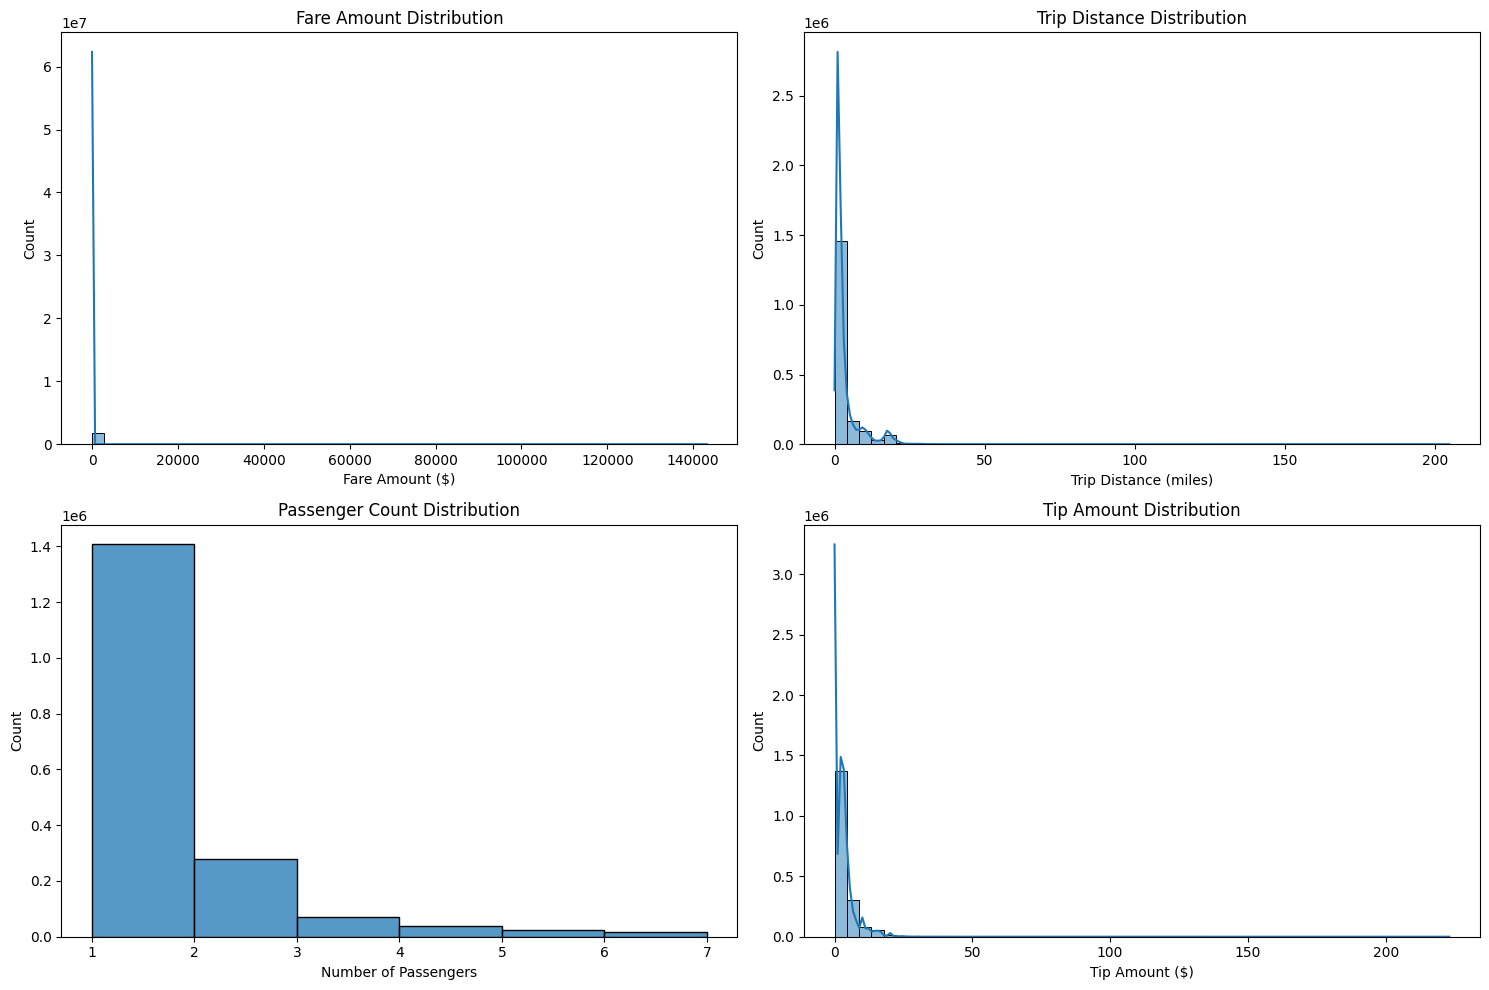

In [37]:
# Assuming your taxi trip DataFrame is named 'df'
# Ensure key columns are in proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# =============================================================================
# Univariate Analysis
# =============================================================================
print("Univariate Analysis: Summary Statistics")
# Display summary statistics for key variables
print(df[['fare_amount', 'trip_distance', 'passenger_count', 'tip_amount']].describe())

# Business Implication:
# Understanding the basic distribution (mean, median, range) helps set baseline expectations
# for fares, distances, and tipping behavior.

# Plot histograms for each key variable
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")

plt.subplot(2,2,2)
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("Trip Distance (miles)")

plt.subplot(2,2,3)
sns.histplot(df['passenger_count'], bins=range(int(df['passenger_count'].min()), int(df['passenger_count'].max())+2), kde=False)
plt.title("Passenger Count Distribution")
plt.xlabel("Number of Passengers")

plt.subplot(2,2,4)
sns.histplot(df['tip_amount'], bins=50, kde=True)
plt.title("Tip Amount Distribution")
plt.xlabel("Tip Amount ($)")

plt.tight_layout()
plt.show()



Segmented Univariate Analysis: Average Fare Amount by Hour
    hour  fare_amount
0      0    20.300463
1      1    18.367893
2      2    17.212489
3      3    18.241580
4      4    23.741714
5      5    27.776434
6      6    23.142301
7      7    19.366831
8      8    18.523663
9      9    18.779535
10    10    20.570149
11    11    19.102762
12    12    19.560657
13    13    20.272927
14    14    21.183554
15    15    21.219749
16    16    21.239421
17    17    19.720844
18    18    18.394036
19    19    18.425844
20    20    19.005689
21    21    19.192130
22    22    19.919509
23    23    21.157025


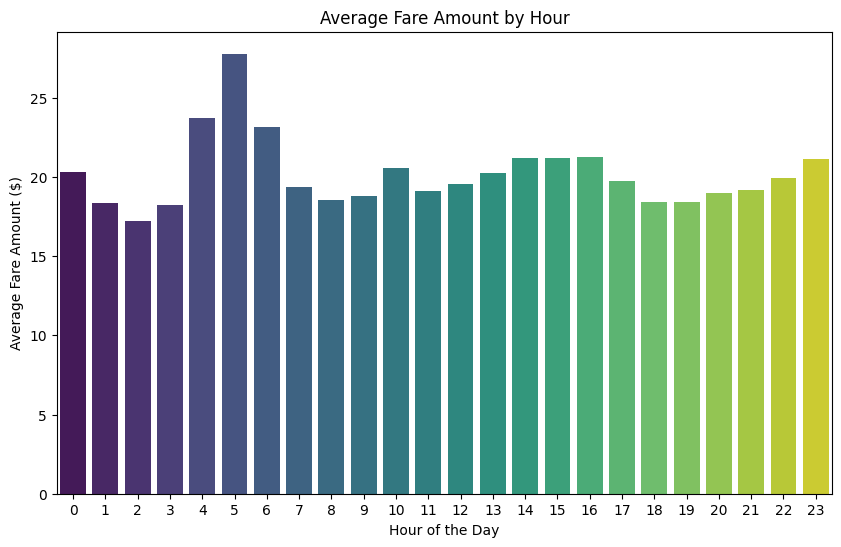

In [38]:
# =============================================================================
# Segmented Univariate Analysis
# =============================================================================
# Example: Analyze average fare_amount by hour (to see how fares vary throughout the day)
avg_fare_by_hour = df.groupby('hour')['fare_amount'].mean().reset_index()
print("\nSegmented Univariate Analysis: Average Fare Amount by Hour")
print(avg_fare_by_hour)

# Business Implication:
# This helps identify when fare amounts are highest during the day.
# For instance, higher average fares during rush hours or late nights might indicate surge pricing or longer wait times.

plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='fare_amount', data=avg_fare_by_hour, palette='viridis')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Amount ($)")
plt.title("Average Fare Amount by Hour")
plt.show()


Bivariate Analysis: Correlation between Trip Distance and Fare Amount: 0.15483839958497114


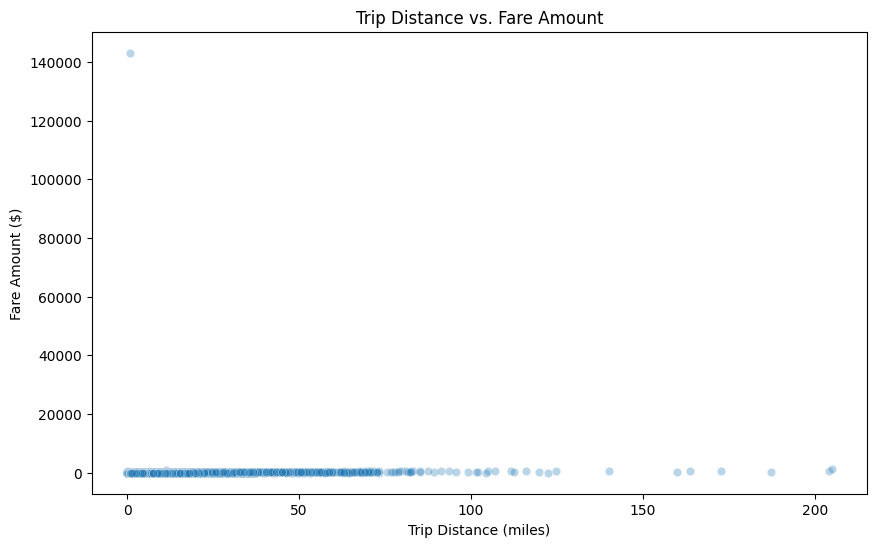

In [39]:
# =============================================================================
# Bivariate Analysis
# =============================================================================
# Example 1: Relationship between trip_distance and fare_amount
corr_distance_fare = df['trip_distance'].corr(df['fare_amount'])
print("\nBivariate Analysis: Correlation between Trip Distance and Fare Amount:", corr_distance_fare)

# Business Implication:
# Even a weak positive correlation can inform pricing strategy; if fare doesn't strongly depend on distance,
# there may be fixed fees or surcharges influencing the fare structure.

plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs. Fare Amount")
plt.show()

# Example 2: Relationship between fare_amount and trip_duration (if trip_duration is available)
if 'trip_duration' in df.columns:
    corr_duration_fare = df['fare_amount'].corr(df['trip_duration'])
    print("Bivariate Analysis: Correlation between Fare Amount and Trip Duration:", corr_duration_fare)

    plt.figure(figsize=(10,6))
    sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.3)
    plt.xlabel("Trip Duration (minutes)")
    plt.ylabel("Fare Amount ($)")
    plt.title("Trip Duration vs. Fare Amount")
    plt.show()